In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from google.colab import drive
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Import data's files
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Thesis/Training_BOP.csv', low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Thesis/Testing_BOP.csv', low_memory=False)

Mounted at /content/drive


In [ ]:
train = train.drop(columns=['sku'])
test = test.drop(columns=['sku'])

In [ ]:
numeric_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

In [ ]:
# Histogram Plot (For Both Train and Test)
def histogram(df):
  plt.figure(figsize=(15, 20))
  for i, col in enumerate(numeric_cols, 1):
      plt.subplot(5, 3, i)
      plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
      plt.title(f'Histogram of {col}', fontsize=10)
      plt.xlabel(col, fontsize=8)
      plt.ylabel('Frequency', fontsize=8)
      plt.grid(axis='y', alpha=0.5)

  plt.tight_layout()
  return plt.show()

In [ ]:
# Boxplot (For Both Train and Test)
def boxplot(df):
  plt.figure(figsize=(15, 20))
  for i, col in enumerate(numeric_cols, 1):
      plt.subplot(5, 3, i)
      sns.boxplot(data=df, x=col, color='lightblue', flierprops={'marker': 'o', 'markersize': 3, 'markerfacecolor': 'red'})
      plt.title(f'Boxplot of {col}', fontsize=10)
      plt.xlabel('')

      if col in ['national_inv', 'forecast_3_month', 'sales_1_month']:
          q1 = df[col].quantile(0.25)
          q3 = df[col].quantile(0.75)
          iqr = q3 - q1
          plt.xlim(q1 - 3*iqr, q3 + 3*iqr)

  plt.tight_layout()
  return plt.show()

In [ ]:
# Scatter plot
def pairwise_scatter(df, sample_size=None, grid=True):
  numeric_cols = df.select_dtypes(include=['number']).columns
  n_cols = len(numeric_cols)

  if sample_size and len(df) > sample_size:
      df = df.sample(sample_size)

  plt.figure(figsize=(25, 25))


  combinations = list(itertools.combinations(numeric_cols, 2))

  for i, (x_col, y_col) in enumerate(combinations, 1):
    plt.subplot(n_cols, n_cols, i)

    plt.scatter(x=df[x_col],
                y=df[y_col],
                color='skyblue',
                alpha=0.5,
                s=8,
                edgecolor='black',
                linewidth=0.3)

    plt.title(f'{x_col} vs {y_col}', fontsize=8, pad=4)
    plt.xlabel(x_col, fontsize=6)
    plt.ylabel(y_col, fontsize=6)

    if grid:
        plt.grid(alpha=0.2)

  plt.tight_layout(pad=1.0)
  plt.show()

In [ ]:
# Pie Chart
def pie_chart(df):
  class_counts = df['went_on_backorder'].value_counts()

  plt.figure(figsize=(8, 6))
  plt.pie(class_counts,
          labels=['No', 'Yes'],
          autopct='%1.1f%%',
          startangle=90,
          colors=['#66b3ff', '#ff9999'],
          explode=(0.1, 0))

  plt.title('Distribution of Backorder Classes', fontsize=14, pad=20)


  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [ ]:
def negative_to_nan(df):
  df[numeric_cols] = df[numeric_cols].applymap(lambda x: np.nan if x < 0 else x)

negative_to_nan(train)
negative_to_nan(test)

/tmp/ipython-input-9-3684819470.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols] = df[numeric_cols].applymap(lambda x: np.nan if x < 0 else x)


In [ ]:
# Negative count
negative_index = []

for i in numeric_cols:
  for x in train.index:
    if train.loc[x, i] < 0:
      negative_index.append(x)

print(len(negative_index))

0


In [ ]:
print(train.isnull().sum())

national_inv           5889
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg     129479
perf_12_month_avg    122051
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64


In [ ]:
print(test.isnull().sum())

national_inv           767
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg     19102
perf_12_month_avg    17976
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64


In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
# Null values (For Train Data)
train.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [ ]:
test.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [ ]:
# Checking duplicate values (For Test Data)
print(train.duplicated().sum())
# Checking duplicate values (For Test Data)
print(test.duplicated().sum())

593553
50880


In [ ]:
train = train.drop_duplicates()
test = test.drop_duplicates()

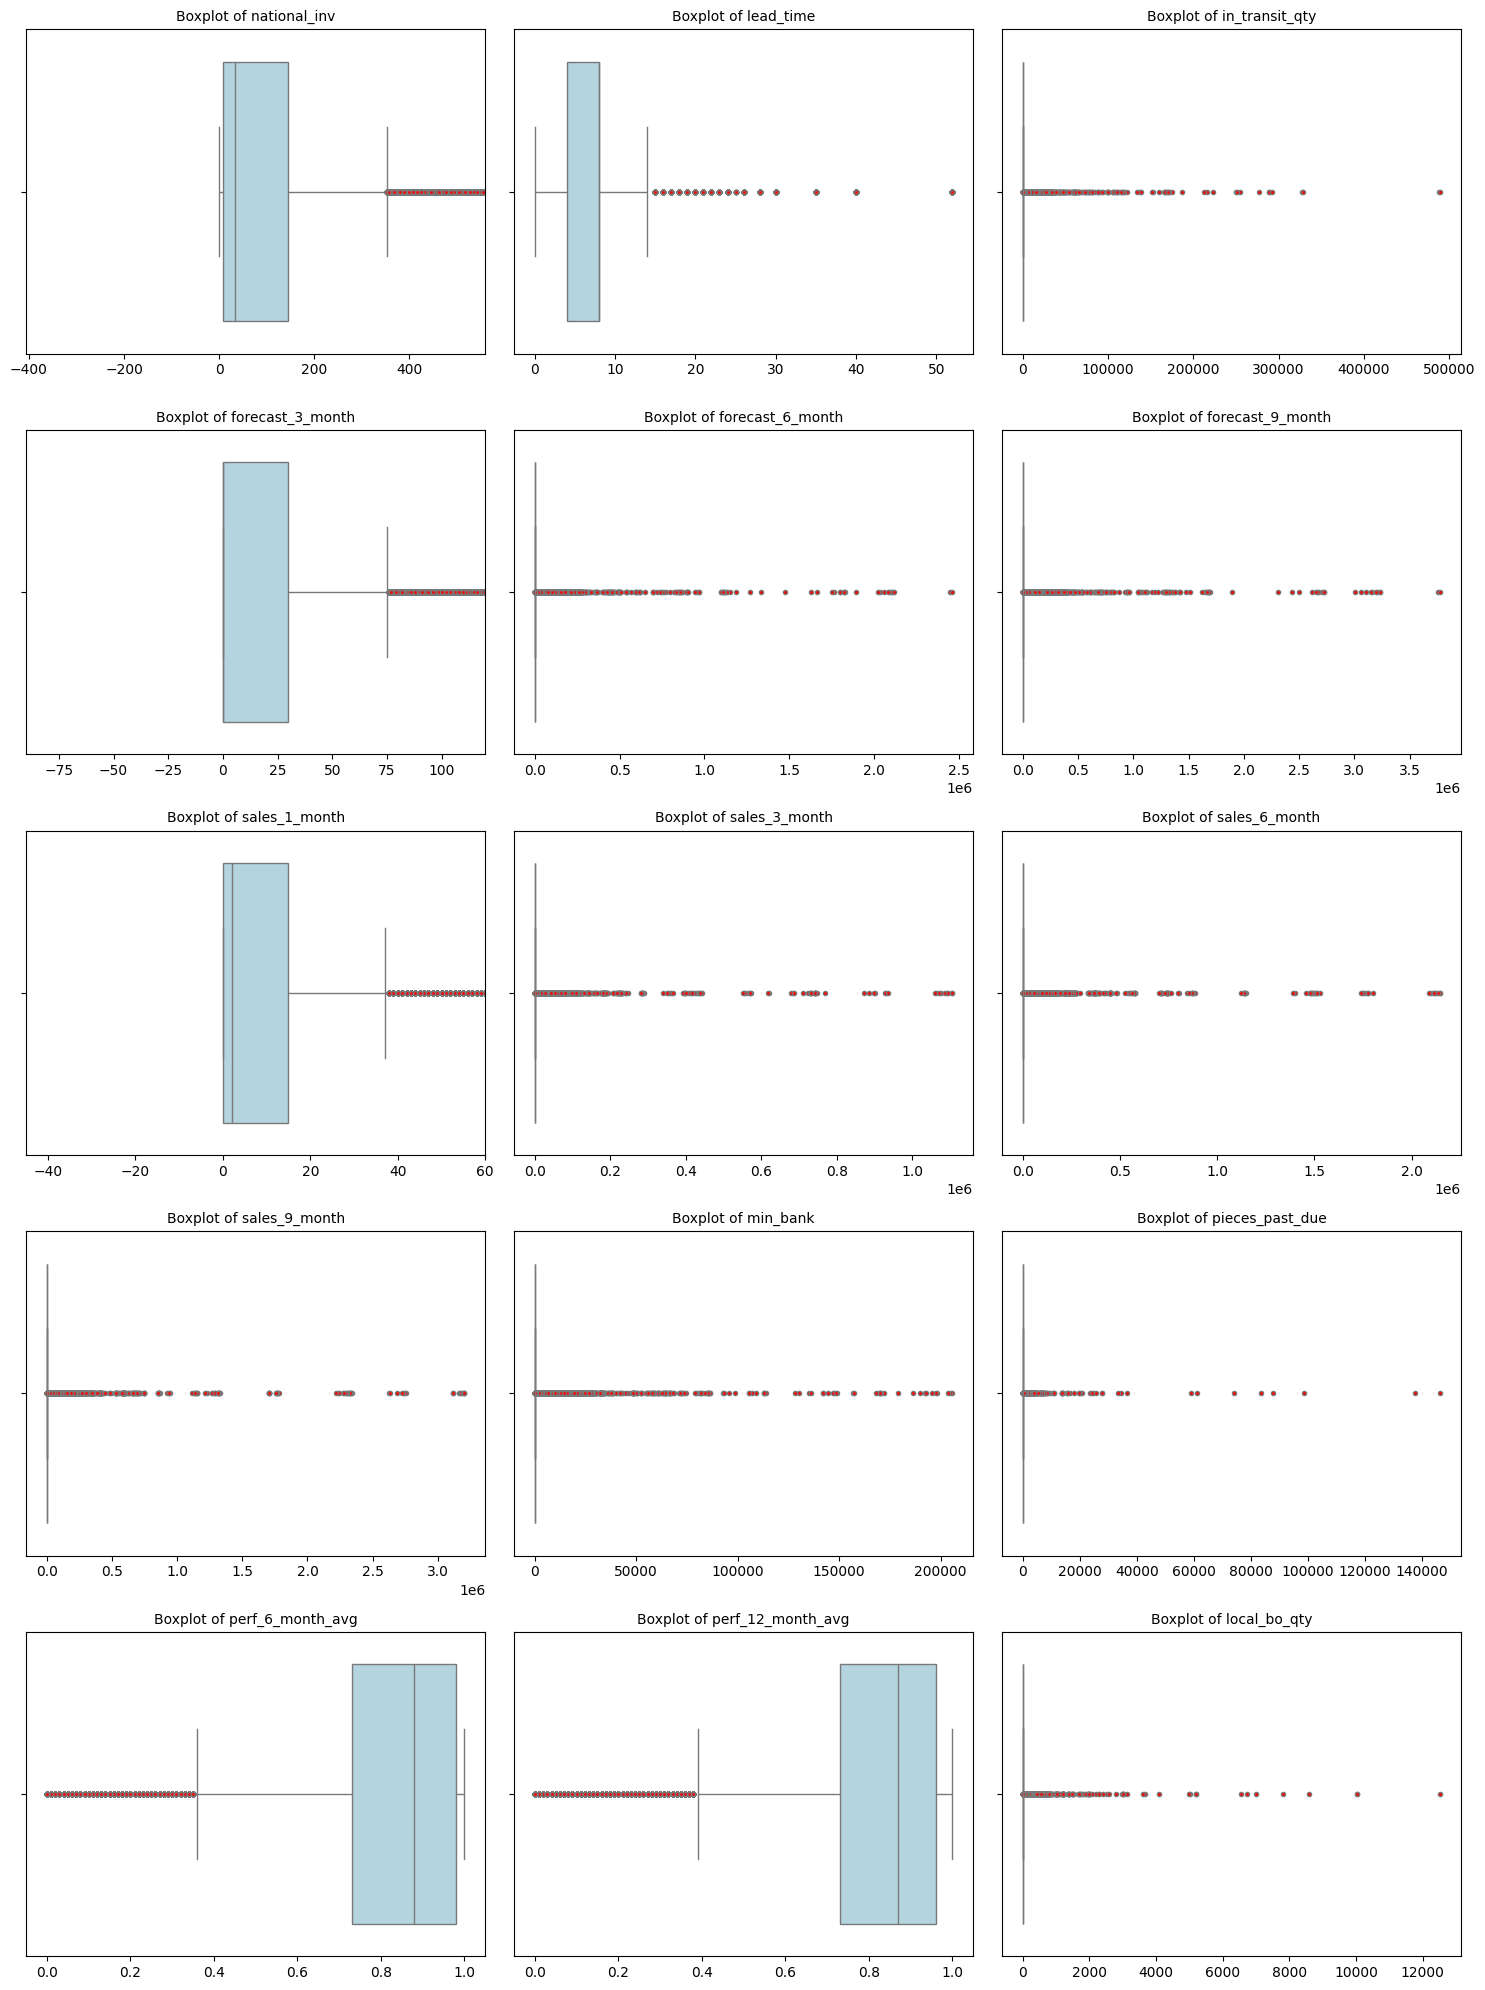

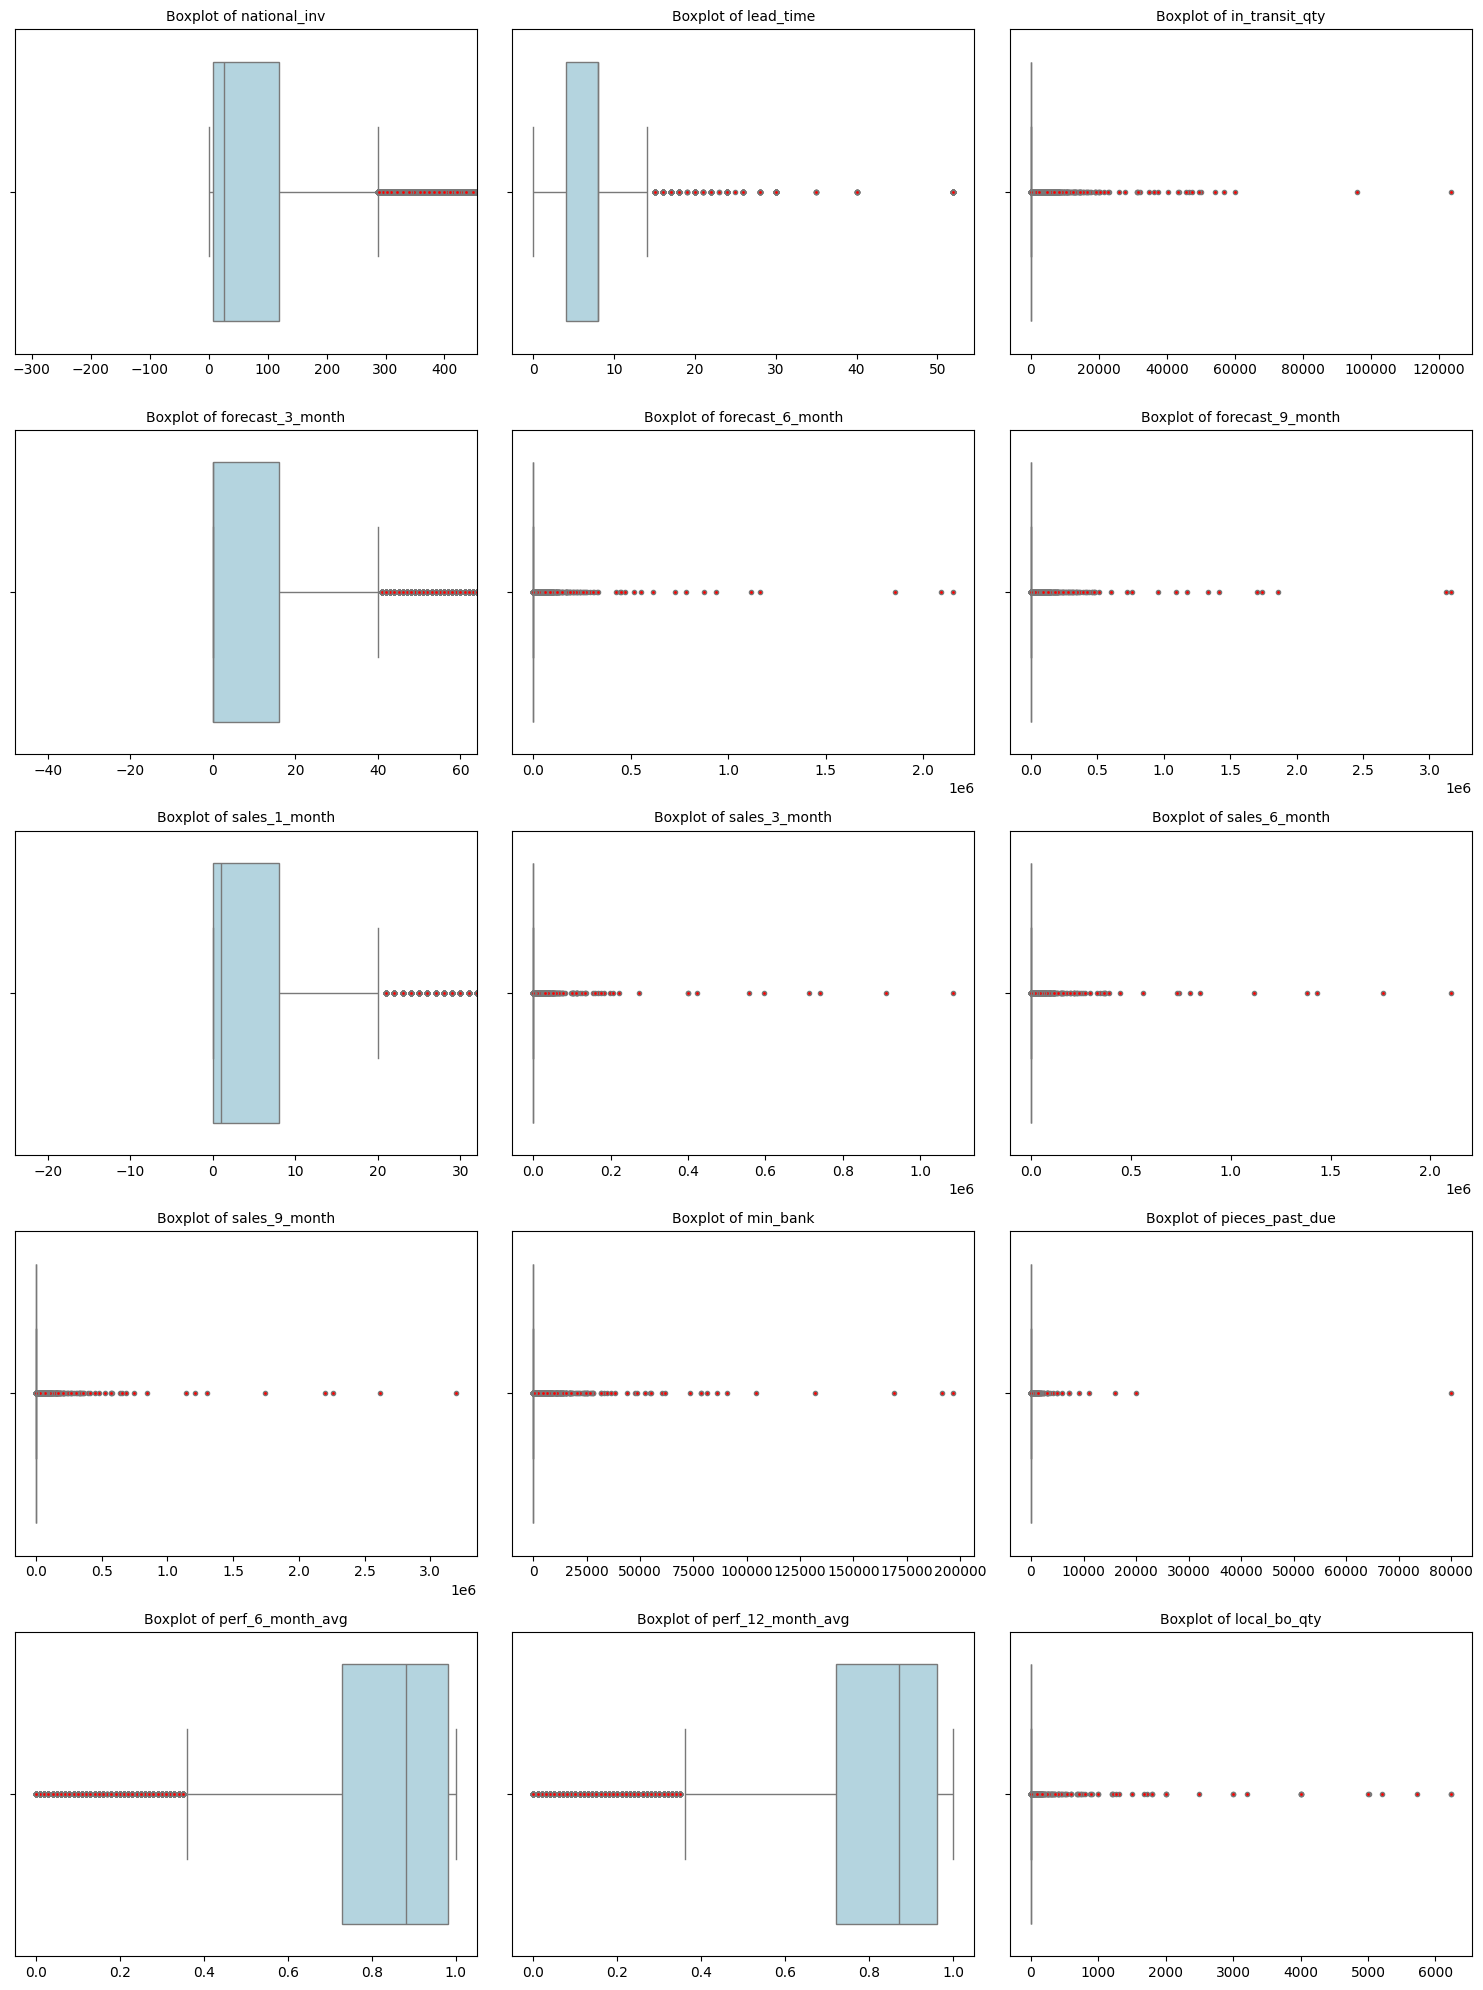

In [ ]:
boxplot(train)
boxplot(test)

In [ ]:
# Outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [ ]:
# Outliers
for col in numeric_cols:
    train = cap_outliers(train, col)
    test = cap_outliers(test, col)

In [ ]:
# Correlation
train.select_dtypes(include="number").corr()

national_inv  lead_time  in_transit_qty  forecast_3_month  \
national_inv           1.000000   0.044286        0.420586          0.373821   
lead_time              0.044286   1.000000       -0.042322         -0.053694   
in_transit_qty         0.420586  -0.042322        1.000000          0.621985   
forecast_3_month       0.373821  -0.053694        0.621985          1.000000   
forecast_6_month       0.450785  -0.051639        0.664210          0.933392   
forecast_9_month       0.483452  -0.048037        0.677310          0.902402   
sales_1_month          0.630368  -0.035962        0.705981          0.741156   
sales_3_month          0.649945  -0.027966        0.710576          0.748505   
sales_6_month          0.660077  -0.017644        0.705131          0.739352   
sales_9_month          0.667240  -0.008107        0.700363          0.733121   
min_bank               0.654554   0.011992        0.691815          0.706724   
pieces_past_due             NaN        NaN             NaN               NaN   
perf_6_month_avg       0.082323   0.003855        0.084308          0.068044   
perf_12_month_avg      0.081531  -0.005436        0.084858          0.068734   
local_bo_qty                NaN        NaN             NaN               NaN   

                   forecast_6_month  forecast_9_month  sales_1_month  \
national_inv               0.450785          0.483452       0.630368   
lead_time                 -0.051639         -0.048037      -0.035962   
in_transit_qty             0.664210          0.677310       0.705981   
forecast_3_month           0.933392          0.902402       0.741156   
forecast_6_month           1.000000          0.973695       0.804542   
forecast_9_month           0.973695          1.000000       0.828636   
sales_1_month              0.804542          0.828636       1.000000   
sales_3_month              0.817837          0.844810       0.971511   
sales_6_month              0.813341          0.841659       0.957537   
sales_9_month              0.807617          0.835703       0.951091   
min_bank                   0.773248          0.797990       0.882010   
pieces_past_due                 NaN               NaN            NaN   
perf_6_month_avg           0.086032          0.094709       0.109186   
perf_12_month_avg          0.085514          0.093828       0.106293   
local_bo_qty                    NaN               NaN            NaN   

                   sales_3_month  sales_6_month  sales_9_month  min_bank  \
national_inv            0.649945       0.660077       0.667240  0.654554   
lead_time              -0.027966      -0.017644      -0.008107  0.011992   
in_transit_qty          0.710576       0.705131       0.700363  0.691815   
forecast_3_month        0.748505       0.739352       0.733121  0.706724   
forecast_6_month        0.817837       0.813341       0.807617  0.773248   
forecast_9_month        0.844810       0.841659       0.835703  0.797990   
sales_1_month           0.971511       0.957537       0.951091  0.882010   
sales_3_month           1.000000       0.987822       0.980491  0.899649   
sales_6_month           0.987822       1.000000       0.993893  0.903050   
sales_9_month           0.980491       0.993893       1.000000  0.905092   
min_bank                0.899649       0.903050       0.905092  1.000000   
pieces_past_due              NaN            NaN            NaN       NaN   
perf_6_month_avg        0.108582       0.107966       0.108368  0.106518   
perf_12_month_avg       0.105702       0.105301       0.105608  0.104653   
local_bo_qty                 NaN            NaN            NaN       NaN   

                   pieces_past_due  perf_6_month_avg  perf_12_month_avg  \
national_inv                   NaN          0.082323           0.081531   
lead_time                      NaN          0.003855          -0.005436   
in_transit_qty                 NaN          0.084308           0.084858   
forecast_3_month               NaN          0.068044           0.068

<Axes: >

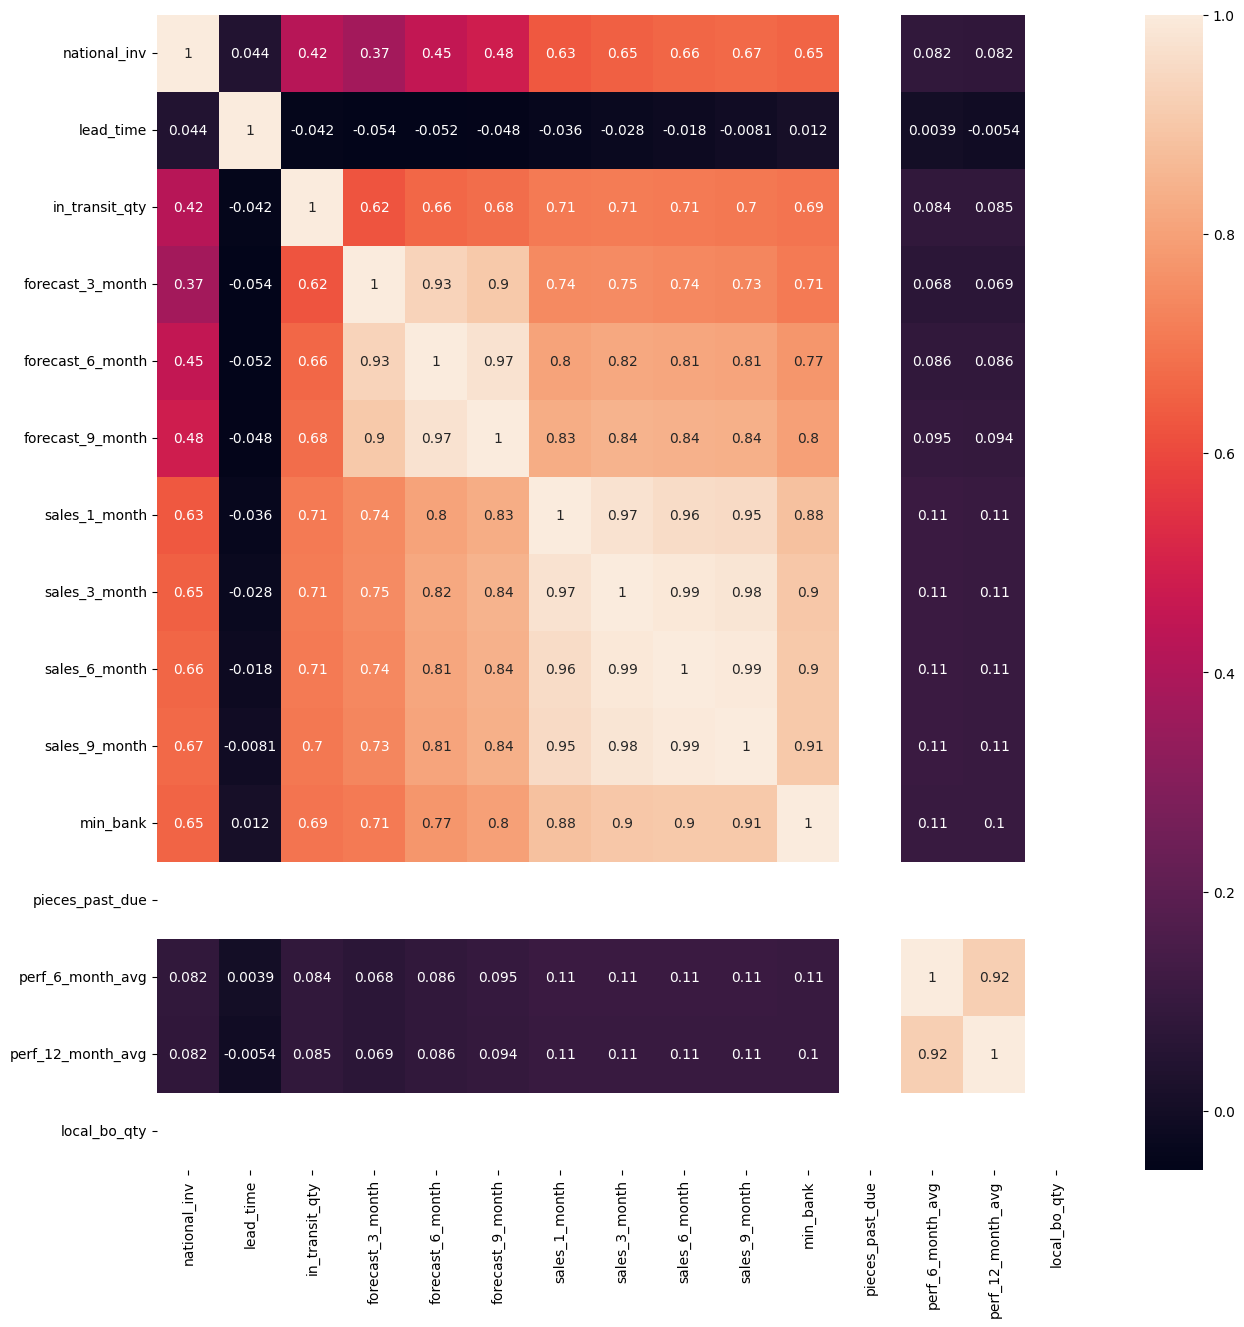

In [ ]:
# Correlation
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include="number").corr(), annot=True)

In [ ]:
# Delete columns
train = train.drop(columns=['pieces_past_due', 'local_bo_qty'])
test = test.drop(columns=['pieces_past_due', 'local_bo_qty'])

In [ ]:
numeric_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

In [ ]:
# Checking duplicate values (For Test Data)
print(train.duplicated().sum())
# Checking duplicate values (For Test Data)
print(test.duplicated().sum())

84334
14007


In [ ]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [ ]:
# Checking garbage values (For Train Data)
for i in categorical_cols:
  print(train[i].value_counts())
  print("****"*10)

potential_issue
No     874417
Yes       724
Name: count, dtype: int64
****************************************
deck_risk
No     733023
Yes    142118
Name: count, dtype: int64
****************************************
oe_constraint
No     874981
Yes       160
Name: count, dtype: int64
****************************************
ppap_risk
No     770842
Yes    104299
Name: count, dtype: int64
****************************************
stop_auto_buy
Yes    852503
No      22638
Name: count, dtype: int64
****************************************
rev_stop
No     875039
Yes       102
Name: count, dtype: int64
****************************************
went_on_backorder
No     866171
Yes      8970
Name: count, dtype: int64
****************************************


In [ ]:
# Checking garbage values (For Test Data)
for i in categorical_cols:
  print(test[i].value_counts())
  print("****"*10)

potential_issue
No     157330
Yes        73
Name: count, dtype: int64
****************************************
deck_risk
No     132534
Yes     24869
Name: count, dtype: int64
****************************************
oe_constraint
No     157360
Yes        43
Name: count, dtype: int64
****************************************
ppap_risk
No     137764
Yes     19639
Name: count, dtype: int64
****************************************
stop_auto_buy
Yes    152474
No       4929
Name: count, dtype: int64
****************************************
rev_stop
No     157379
Yes        24
Name: count, dtype: int64
****************************************
went_on_backorder
No     154992
Yes      2411
Name: count, dtype: int64
****************************************


In [ ]:
# Describe Data
print("=== Train Data ===")
print(train.describe().T)

print("=== Test Data ===")
print(test.describe().T)

=== Train Data ===
                      count       mean         std    min   25%    50%  \
national_inv       875141.0  79.878334  107.211278  0.000  8.00  28.00   
lead_time          875141.0   6.928869    3.443213  0.000  4.00   8.00   
in_transit_qty     875141.0   2.040302    3.726817  0.000  0.00   0.00   
forecast_3_month   875141.0  15.732717   26.520368  0.000  0.00   0.00   
forecast_6_month   875141.0  37.049332   60.795049  0.000  0.00   2.00   
forecast_9_month   875141.0  58.106403   93.621074  0.000  0.00   5.00   
sales_1_month      875141.0   8.233513   12.262591  0.000  0.00   2.00   
sales_3_month      875141.0  28.097119   41.441555  0.000  1.00   7.00   
sales_6_month      875141.0  57.410240   84.054350  0.000  3.00  15.00   
sales_9_month      875141.0  87.672433  128.573404  0.000  4.00  22.00   
min_bank           875141.0  11.194277   18.445632  0.000  0.00   1.00   
perf_6_month_avg   875141.0   0.817898    0.188163  0.355  0.73   0.87   
perf_12_month_avg  

In [ ]:
# Describe data
print("=== Train Data ===")
train.describe(include="object")

=== Train Data ===


potential_issue deck_risk oe_constraint ppap_risk stop_auto_buy  \
count           875141    875141        875141    875141        875141   
unique               2         2             2         2             2   
top                 No        No            No        No           Yes   
freq            874417    733023        874981    770842        852503   

       rev_stop went_on_backorder  
count    875141            875141  
unique        2                 2  
top          No                No  
freq     875039            866171

In [ ]:
print("=== Test Data ===")
test.describe(include="object")

=== Test Data ===


potential_issue deck_risk oe_constraint ppap_risk stop_auto_buy  \
count           157403    157403        157403    157403        157403   
unique               2         2             2         2             2   
top                 No        No            No        No           Yes   
freq            157330    132534        157360    137764        152474   

       rev_stop went_on_backorder  
count    157403            157403  
unique        2                 2  
top          No                No  
freq     157379            154992

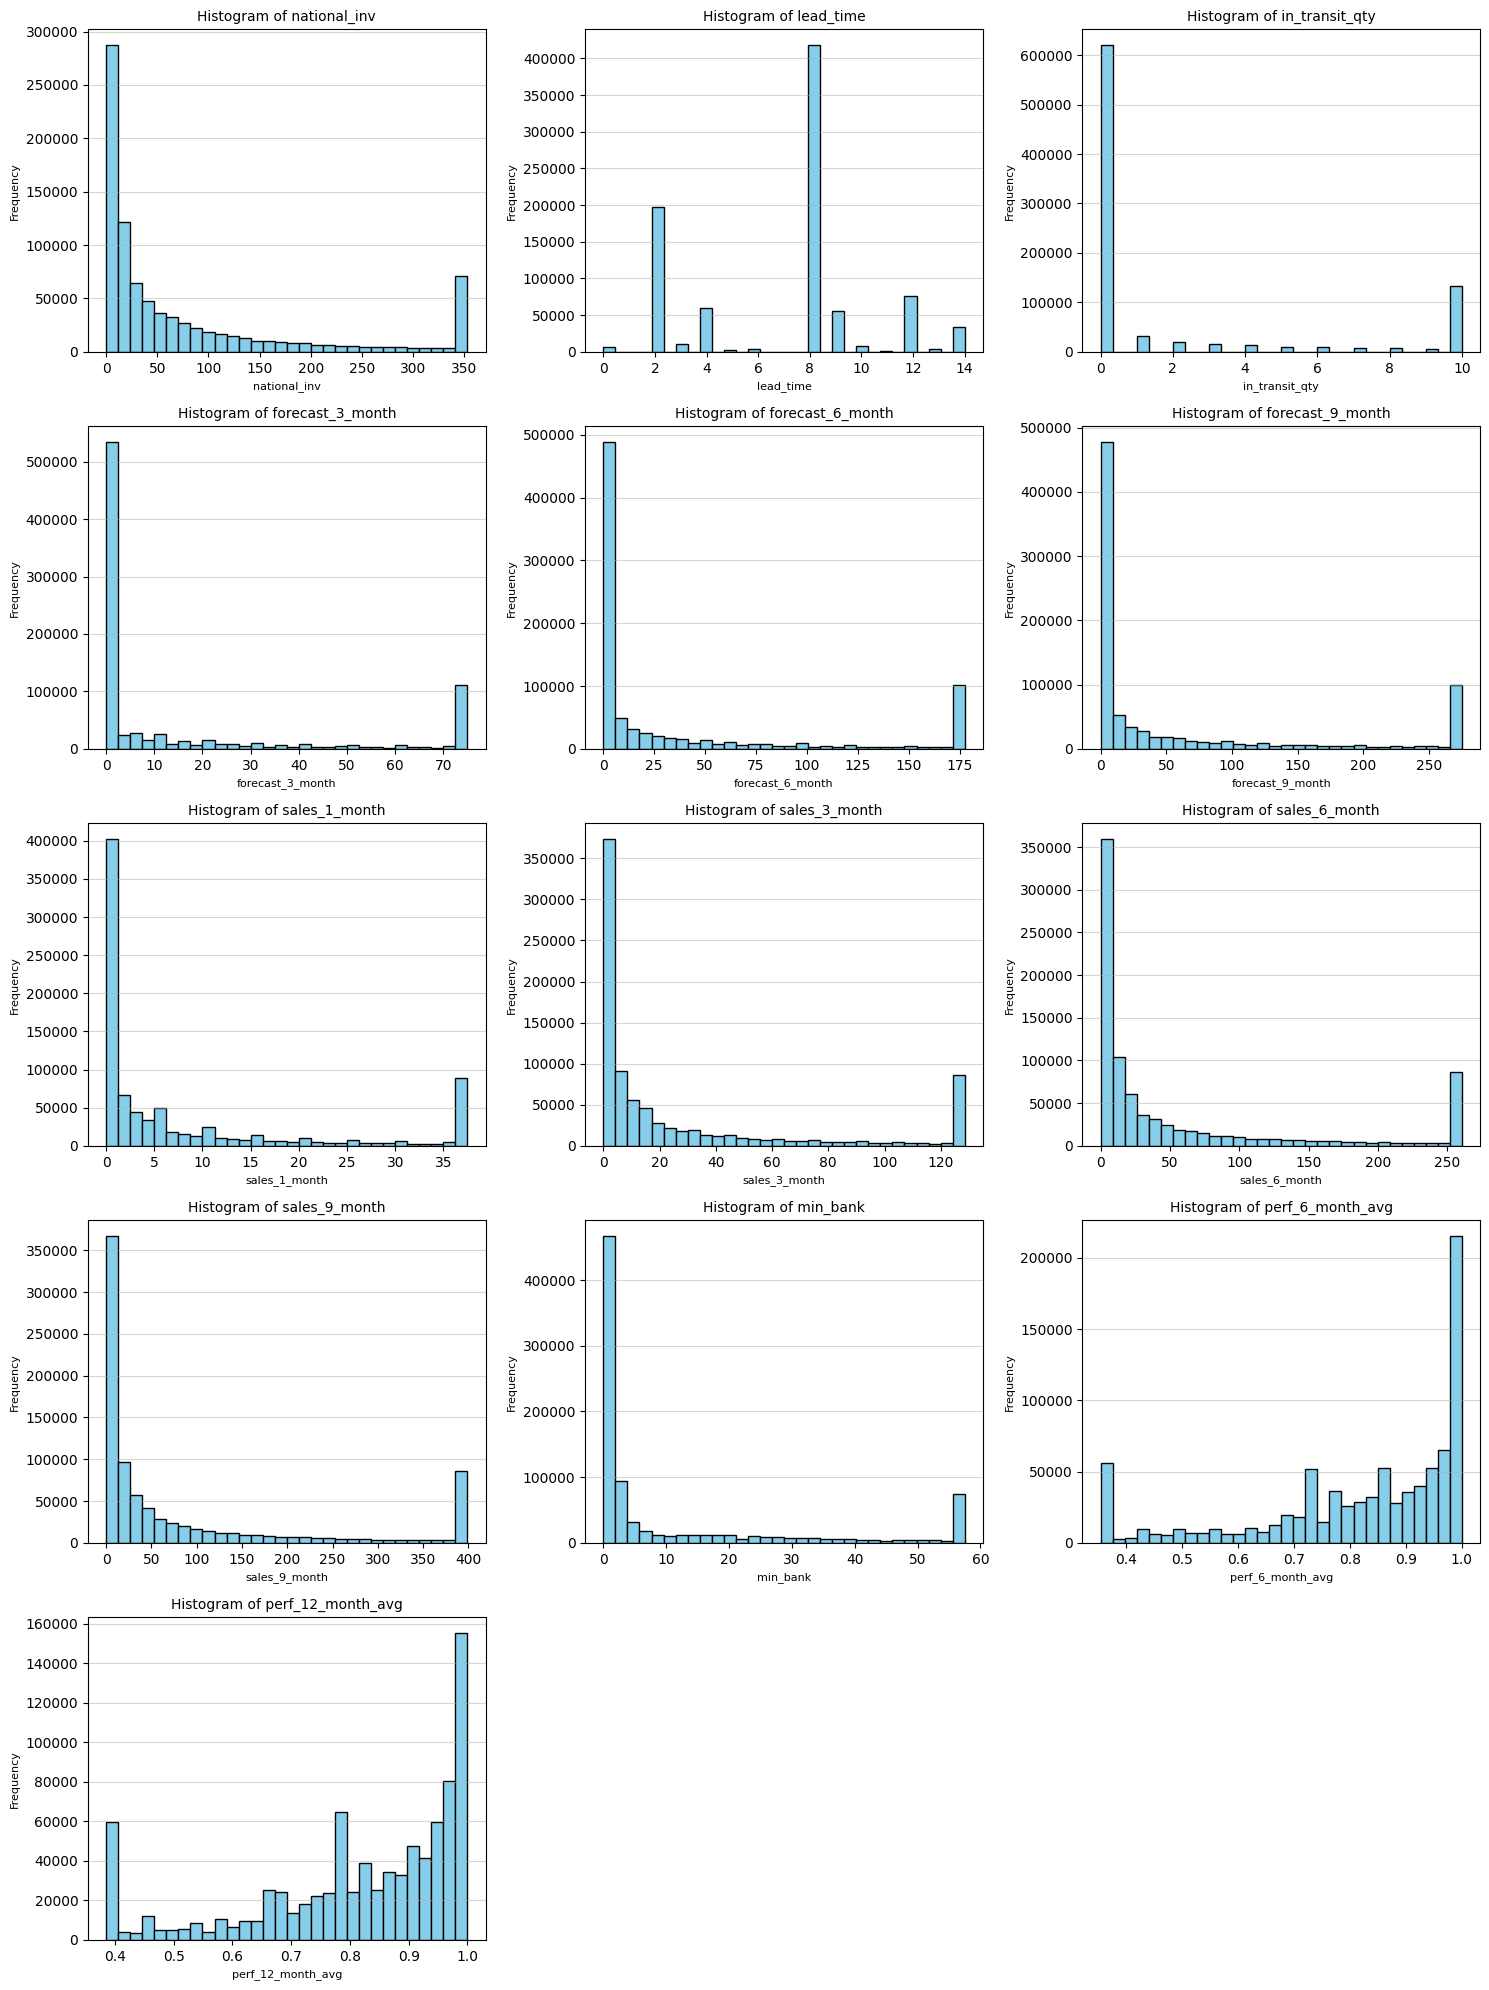

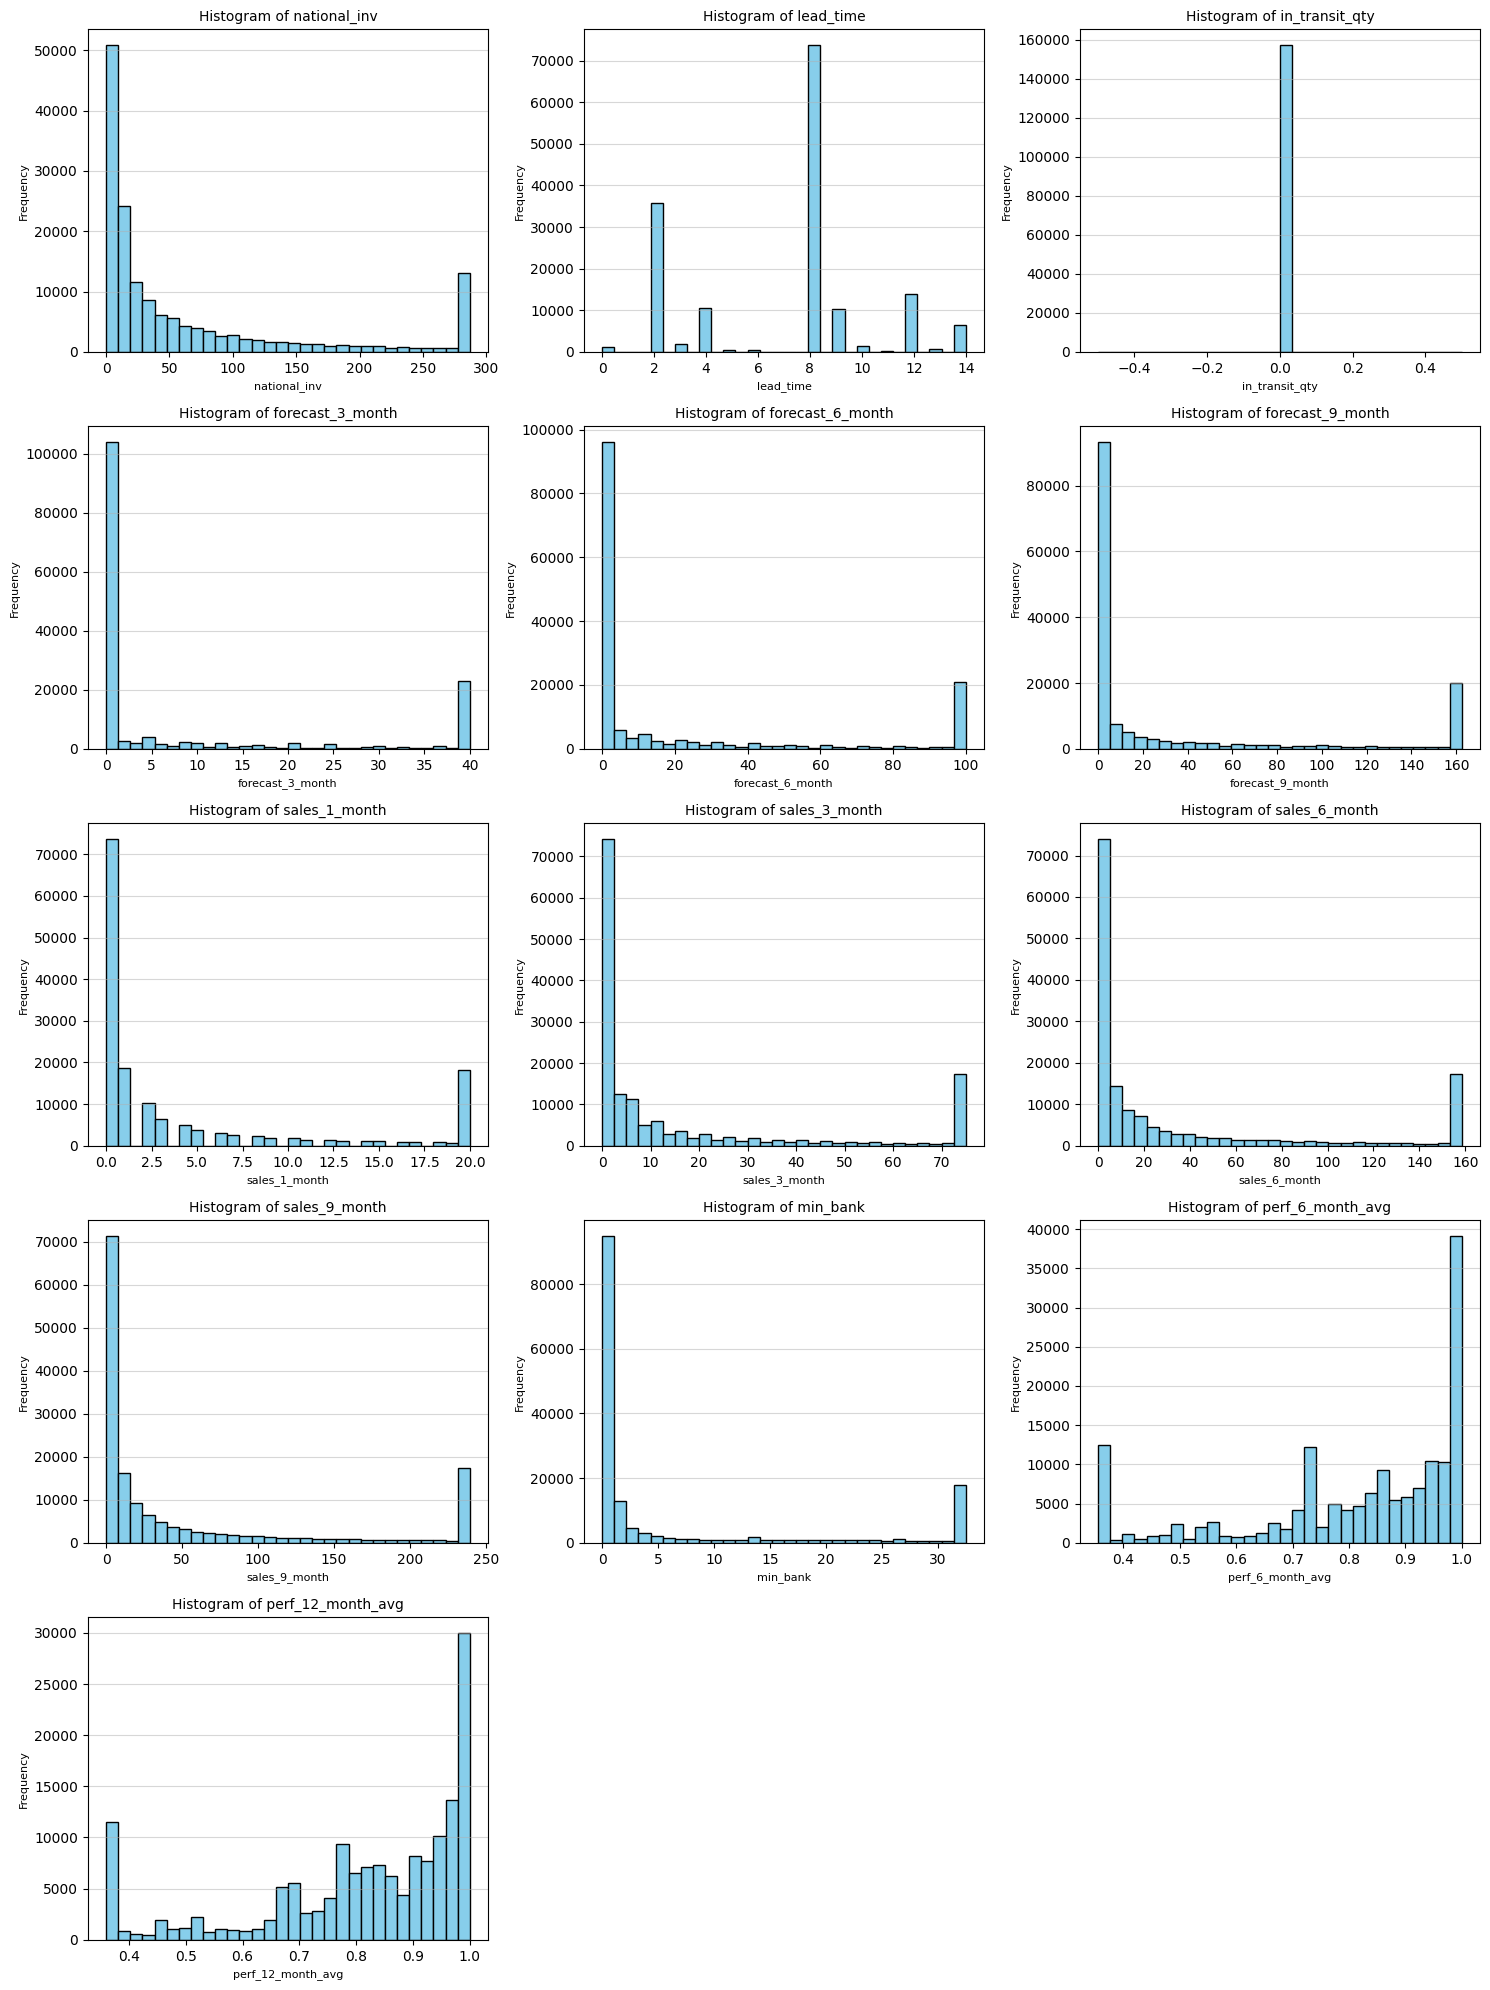

In [ ]:
histogram(train)
histogram(test)

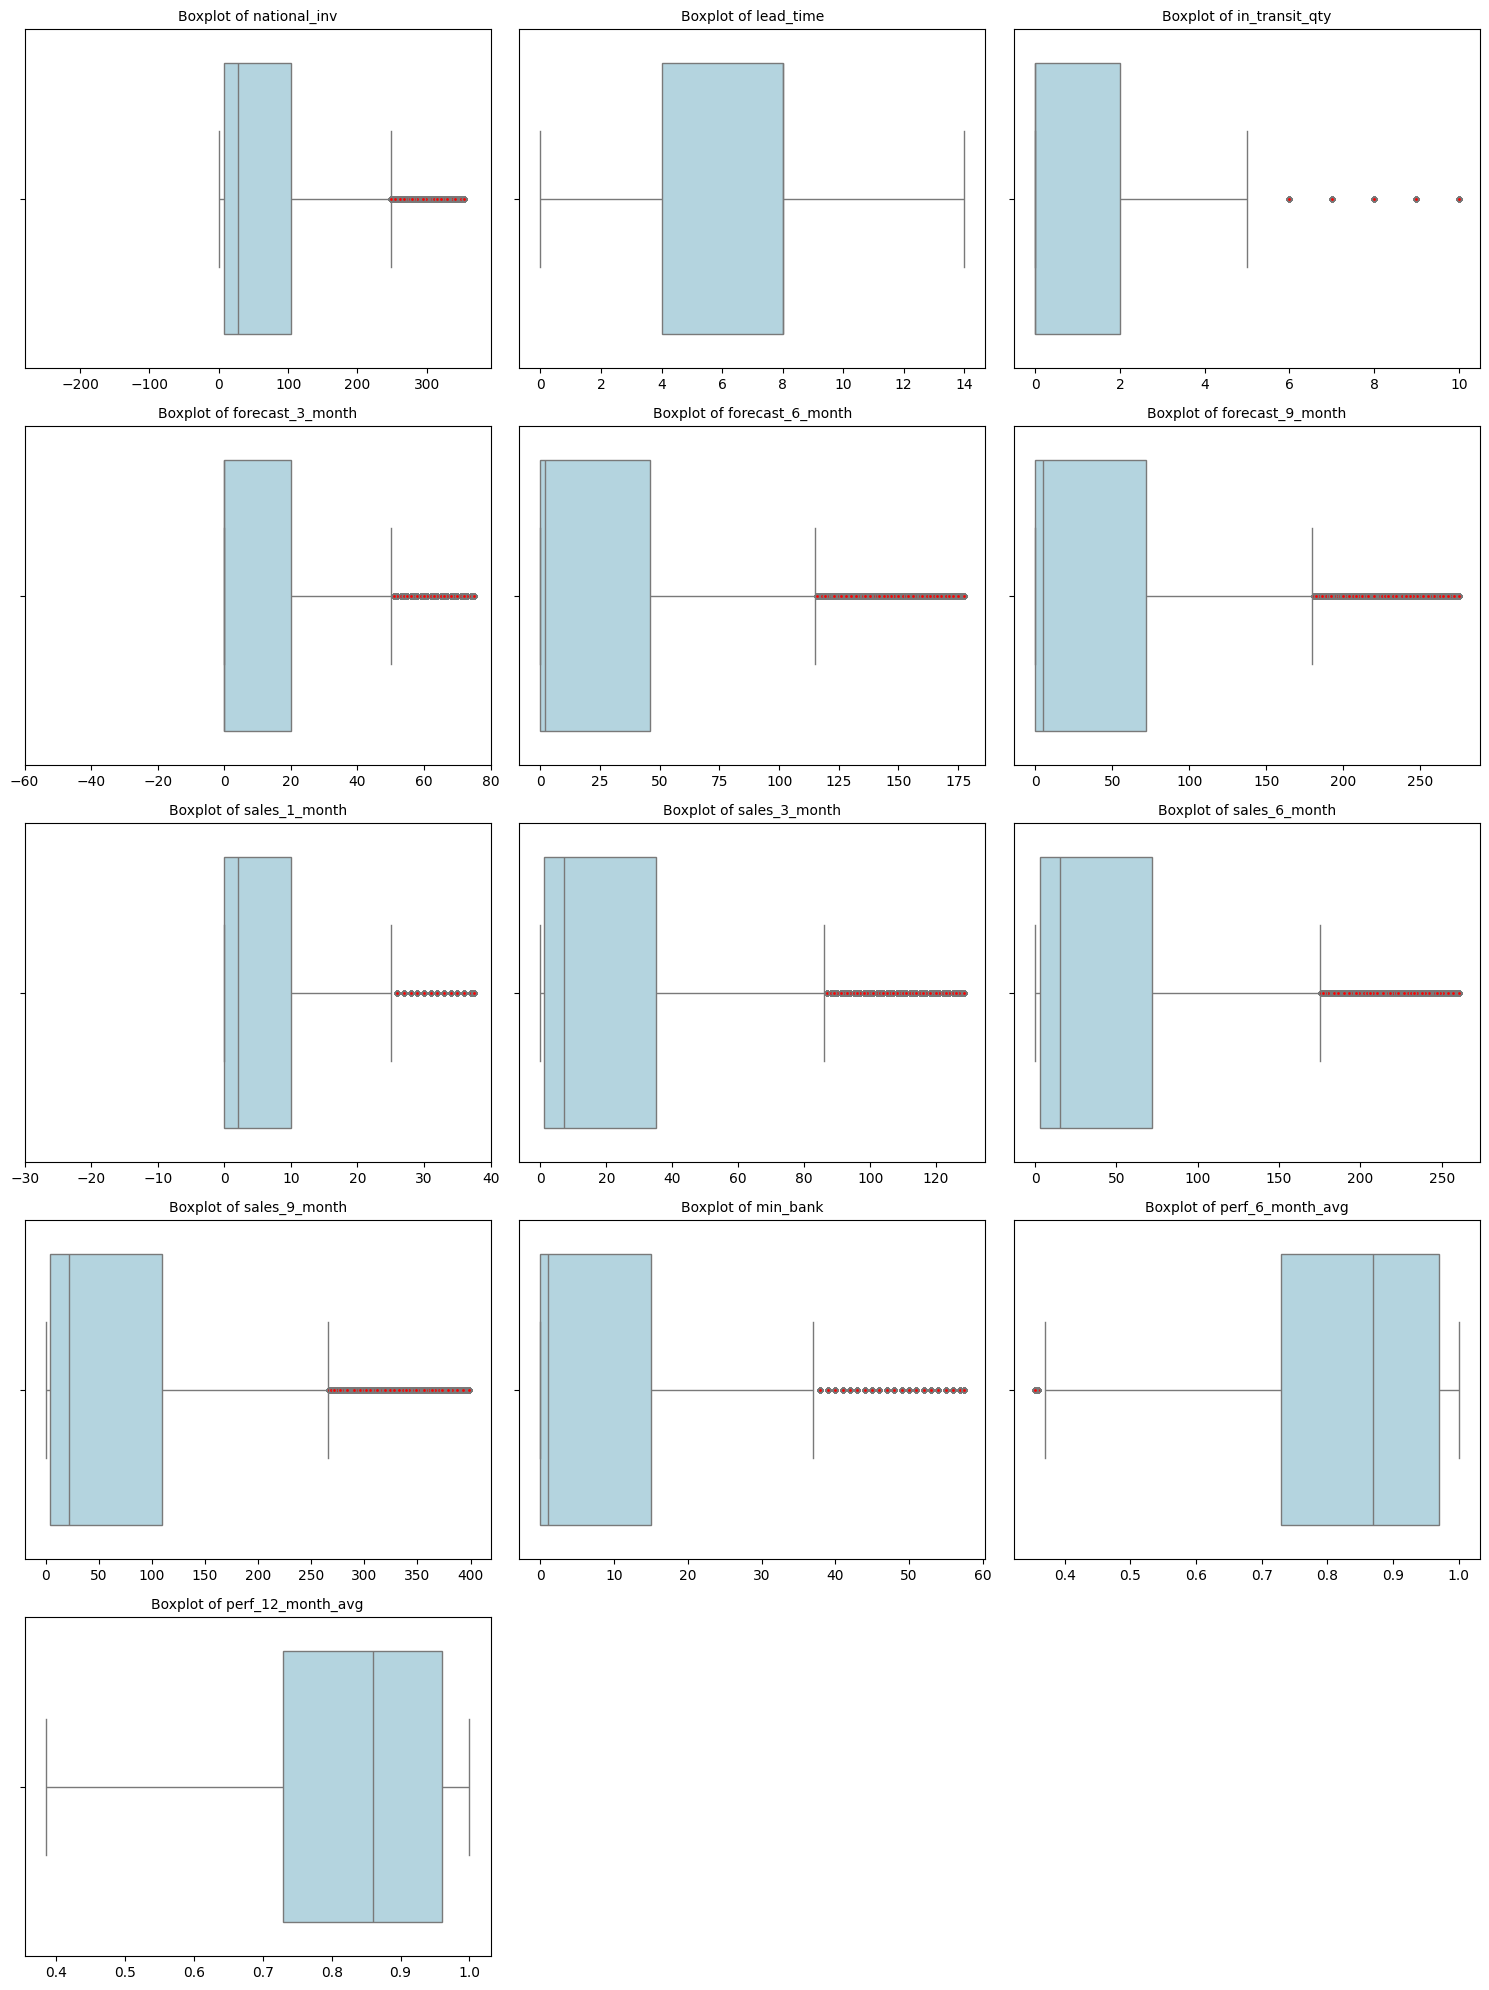

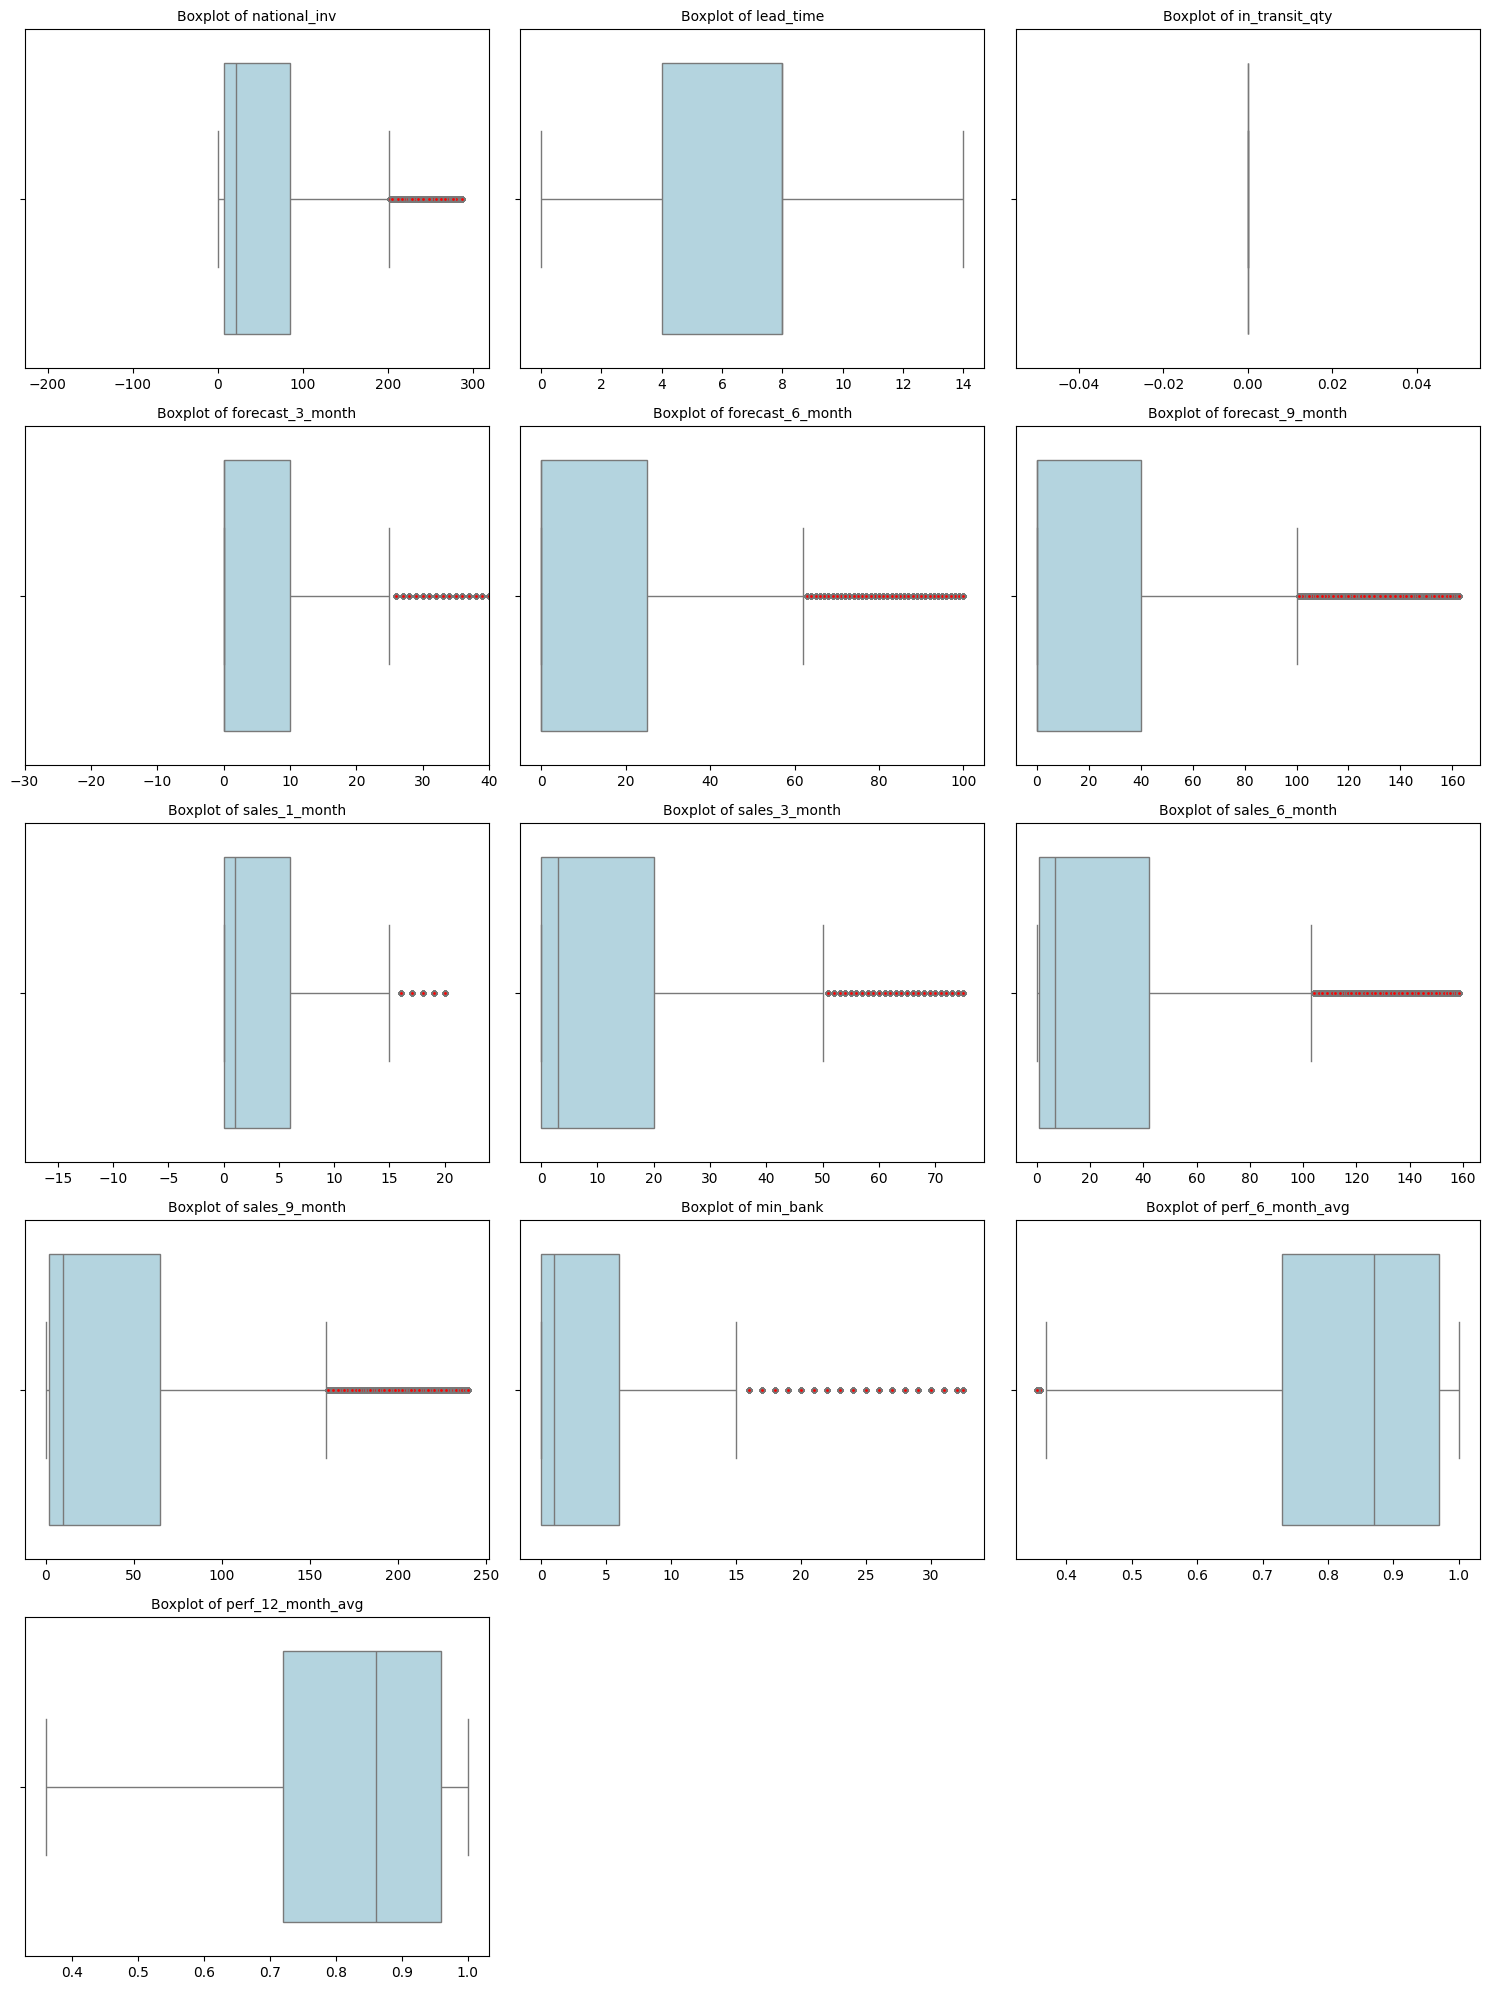

In [ ]:
boxplot(train)
boxplot(test)

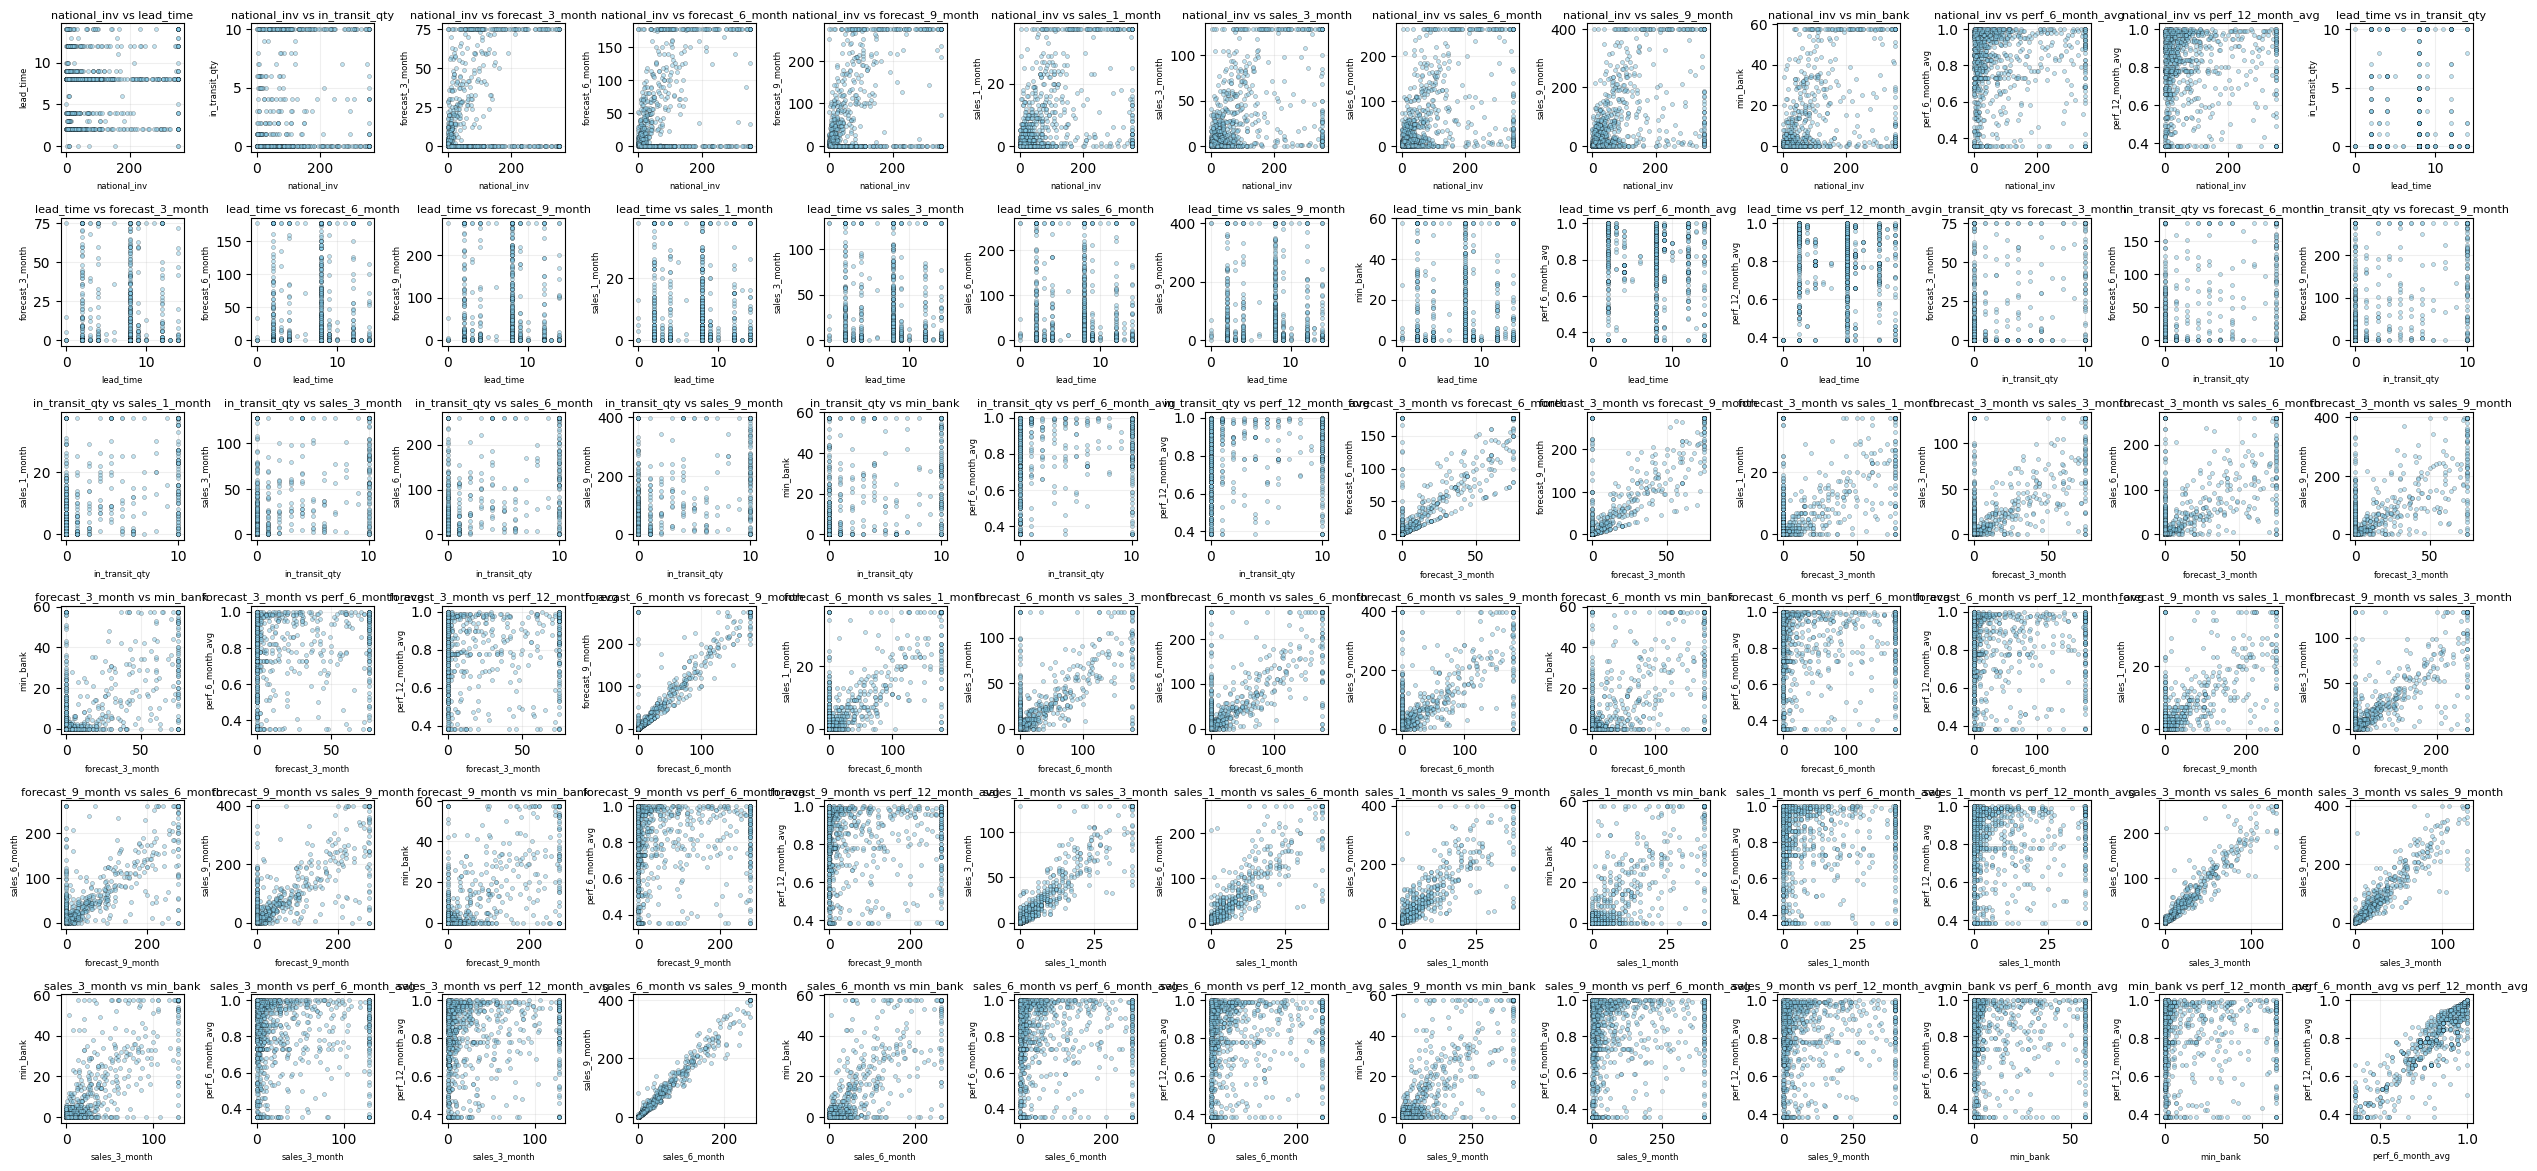

In [ ]:
pairwise_scatter(train, sample_size=1000)

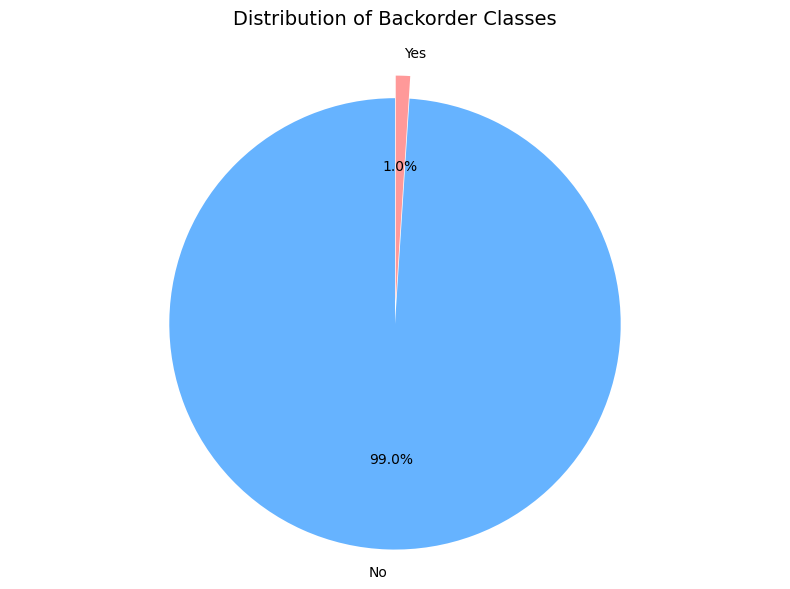

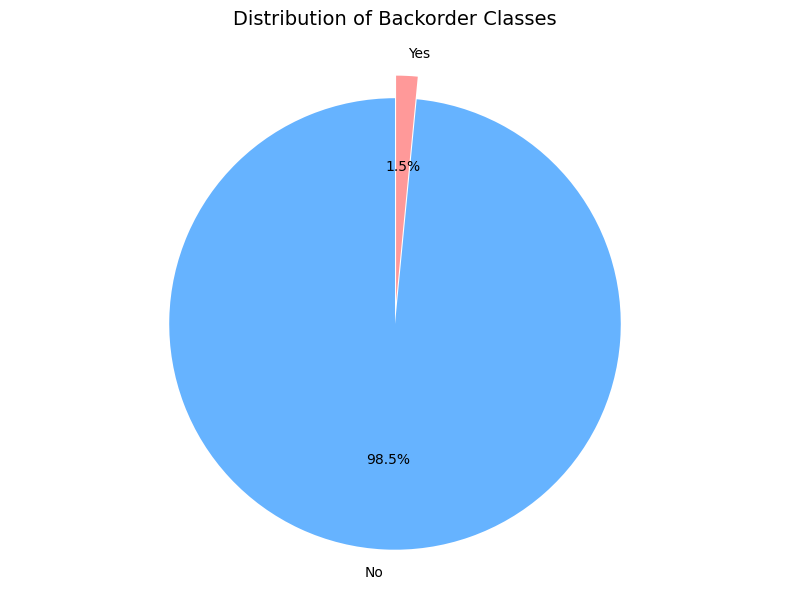

In [ ]:
pie_chart(train)
pie_chart(test)

In [ ]:
# Correlation
train.select_dtypes(include="number").corr()

national_inv  lead_time  in_transit_qty  forecast_3_month  \
national_inv           1.000000   0.066415        0.270418          0.212616   
lead_time              0.066415   1.000000       -0.030620         -0.041709   
in_transit_qty         0.270418  -0.030620        1.000000          0.557384   
forecast_3_month       0.212616  -0.041709        0.557384          1.000000   
forecast_6_month       0.293979  -0.040716        0.602739          0.925176   
forecast_9_month       0.332522  -0.037110        0.617514          0.888642   
sales_1_month          0.506618  -0.023421        0.641532          0.707621   
sales_3_month          0.532085  -0.013463        0.647820          0.717703   
sales_6_month          0.547077  -0.000652        0.640590          0.705163   
sales_9_month          0.557118   0.011272        0.634018          0.696577   
min_bank               0.537790   0.037340        0.619593          0.655953   
perf_6_month_avg       0.039445   0.000732        0.047797          0.027573   
perf_12_month_avg      0.038059  -0.006178        0.047973          0.027668   

                   forecast_6_month  forecast_9_month  sales_1_month  \
national_inv               0.293979          0.332522       0.506618   
lead_time                 -0.040716         -0.037110      -0.023421   
in_transit_qty             0.602739          0.617514       0.641532   
forecast_3_month           0.925176          0.888642       0.707621   
forecast_6_month           1.000000          0.969432       0.777404   
forecast_9_month           0.969432          1.000000       0.805068   
sales_1_month              0.777404          0.805068       1.000000   
sales_3_month              0.795761          0.827483       0.960417   
sales_6_month              0.789546          0.823116       0.940760   
sales_9_month              0.781550          0.814779       0.931629   
min_bank                   0.729393          0.758120       0.839175   
perf_6_month_avg           0.044549          0.053291       0.067965   
perf_12_month_avg          0.043286          0.051533       0.064049   

                   sales_3_month  sales_6_month  sales_9_month  min_bank  \
national_inv            0.532085       0.547077       0.557118  0.537790   
lead_time              -0.013463      -0.000652       0.011272  0.037340   
in_transit_qty          0.647820       0.640590       0.634018  0.619593   
forecast_3_month        0.717703       0.705163       0.696577  0.655953   
forecast_6_month        0.795761       0.789546       0.781550  0.729393   
forecast_9_month        0.827483       0.823116       0.814779  0.758120   
sales_1_month           0.960417       0.940760       0.931629  0.839175   
sales_3_month           1.000000       0.982796       0.972397  0.863537   
sales_6_month           0.982796       1.000000       0.991367  0.868512   
sales_9_month           0.972397       0.991367       1.000000  0.871337   
min_bank                0.863537       0.868512       0.871337  1.000000   
perf_6_month_avg        0.066947       0.066106       0.066619  0.064889   
perf_12_month_avg       0.063071       0.062537       0.062935  0.062462   

                   perf_6_month_avg  perf_12_month_avg  
national_inv               0.039445           0.038059  
lead_time                  0.000732          -0.006178  
in_transit_qty             0.047797           0.047973  
forecast_3_month           0.027573           0.027668  
forecast_6_month           0.044549           0.043286  
forecast_9_month           0.053291           0.051533  
sales_1_month              0.067965           0.064049  
sales_3_month              0.066947           0.063071  
sales_6_month              0.066106           0.062537  
sales_9_month              0.066619           0.062935  
min_bank                   0.064889           0.062462  
perf_6_month_avg           1.000000           0.916652  
perf_12_month_avg          0.916652           1.000000

<Axes: >

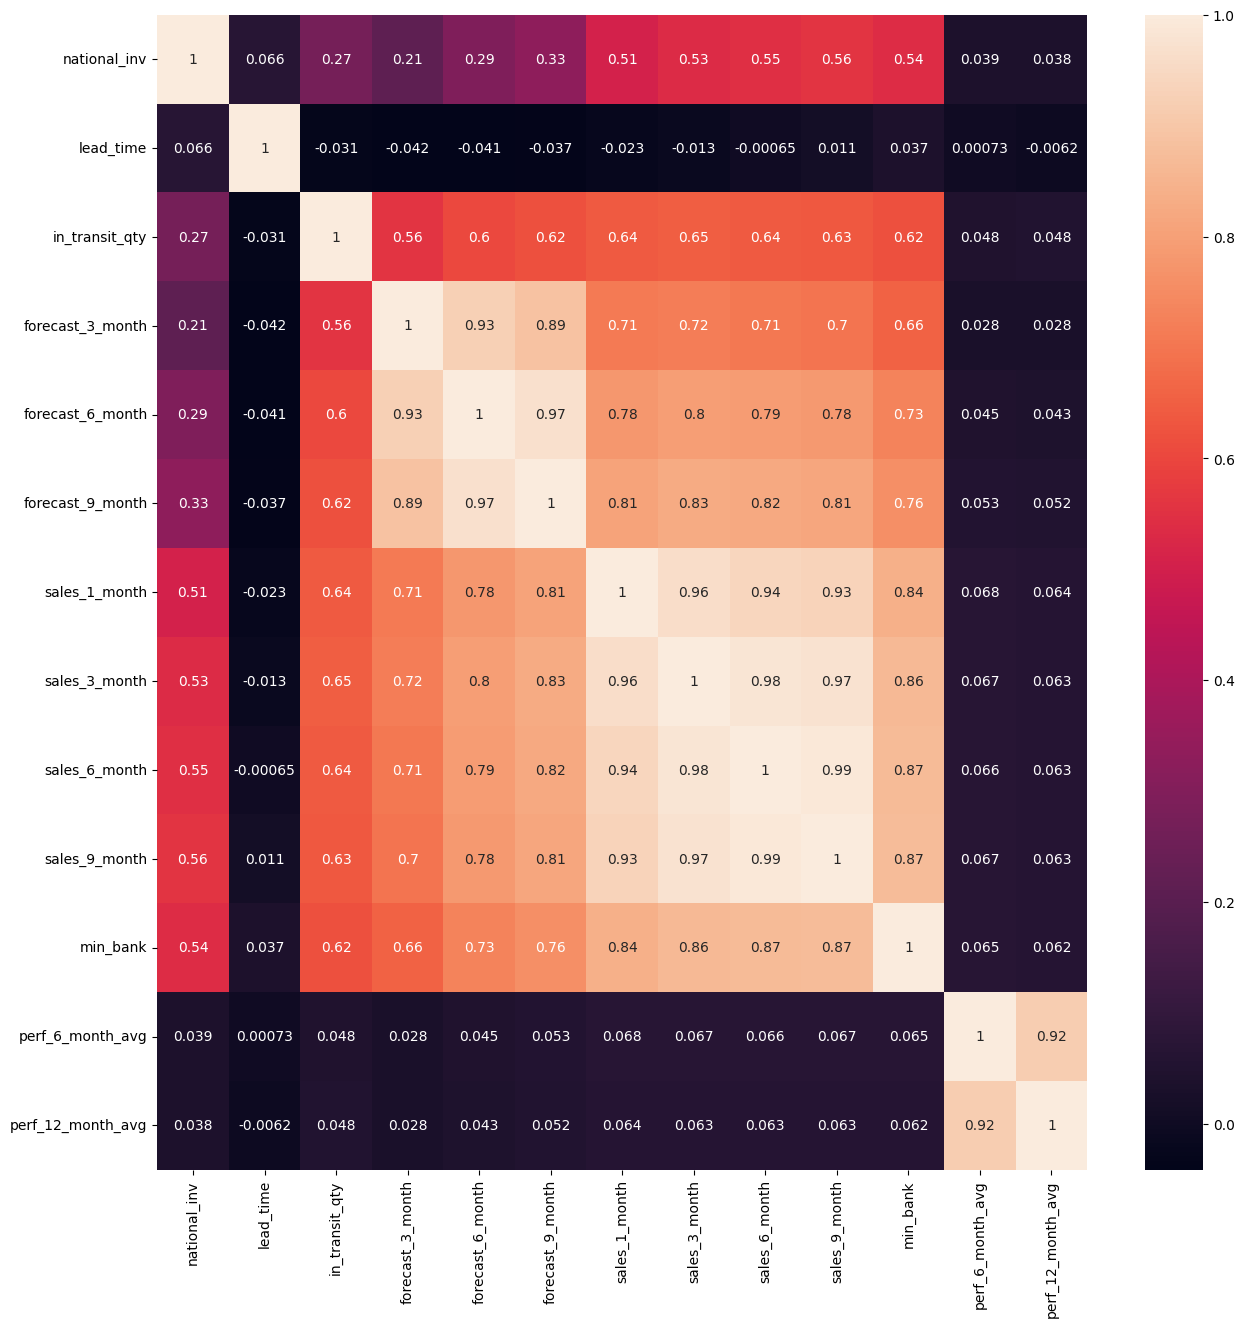

In [ ]:
# Correlation
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include="number").corr(), annot=True)

In [ ]:
# Categorical Encoding
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [ ]:
# Normalaization
scaler = MinMaxScaler(feature_range=(0, 1))
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

print(train.head())
print(test.head())

   national_inv  lead_time  in_transit_qty  forecast_3_month  \
1      0.005666   0.642857             0.0               0.0   
3      0.019830   0.571429             0.0               0.0   
5      0.036827   0.571429             0.0               0.0   
7      0.016997   0.142857             0.0               0.0   
9      0.011331   0.571429             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
1               0.0               0.0            0.0            0.0   
3               0.0               0.0            0.0            0.0   
5               0.0               0.0            0.0            0.0   
7               0.0               0.0            0.0            0.0   
9               0.0               0.0            0.0            0.0   

   sales_6_month  sales_9_month  min_bank  potential_issue  perf_6_month_avg  \
1            0.0            0.0  0.000000                0          0.984496   
3            0.0            

In [ ]:
# Resampling
def balance_datasets(train_df, test_df, target_col='went_on_backorder',
                    train_counts={0: 20000, 1: 20000},
                    test_counts=None, random_state=42):
    def balance_single_dataset(df, counts, random_state):
        X = df.drop(target_col, axis=1)
        y = df[target_col]

        print(f"Before resampling: {Counter(y)}")

        if 1 in counts:
            smote = SMOTE(sampling_strategy={1: counts[1]},
                         random_state=random_state)
            X, y = smote.fit_resample(X, y)

        if 0 in counts:
            under_sampler = RandomUnderSampler(sampling_strategy={0: counts[0]},
                                             random_state=random_state)
            X, y = under_sampler.fit_resample(X, y)

        print(f"After resampling: {Counter(y)}")

        balanced_df = pd.concat([pd.DataFrame(X),
                               pd.DataFrame(y, columns=[target_col])],
                              axis=1)
        return balanced_df

    print("Balancing train dataset:")
    train = balance_single_dataset(train_df, train_counts, random_state)

    if test_counts is None:
        total_train = sum(train_counts.values())
        ratio = train_counts[1] / total_train
        test_size = len(test_df)
        test_counts = {
            0: int((1 - ratio) * test_size),
            1: int(ratio * test_size)
        }

    print("Balancing test dataset:")
    test = balance_single_dataset(test_df, test_counts, random_state)

    return train, test

In [ ]:
train, test = balance_datasets(
    train_df=train,
    test_df=test,
    target_col='went_on_backorder',
    train_counts={0: 20000, 1: 20000},
    test_counts={0: 7500, 1: 2500},
    random_state=42
)

Balancing train dataset:
Before resampling: Counter({0: 866171, 1: 8970})
After resampling: Counter({0: 20000, 1: 20000})
Balancing test dataset:
Before resampling: Counter({0: 154992, 1: 2411})
After resampling: Counter({0: 7500, 1: 2500})


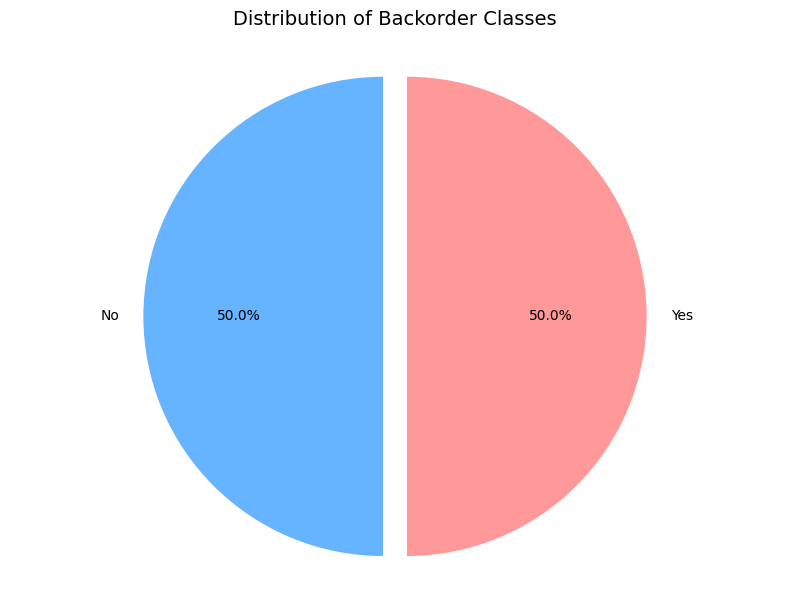

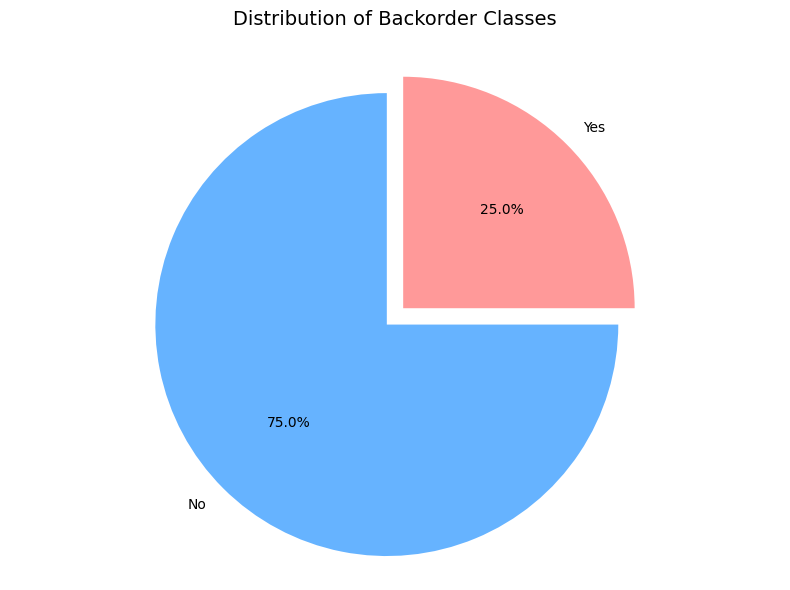

In [ ]:
pie_chart(train)
pie_chart(test)

In [ ]:
# Data info
print("Train Data Info:")
print(train.info())
print("Test Data Info:")
print(test.info())

# First 5 rows
print("First 5 rows of Train Data:")
print(train.head())

# Last 5 rows
print("Last 5 rows of Train Data:")
print(train.tail())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 134311 to 886170
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   national_inv       40000 non-null  float64
 1   lead_time          40000 non-null  float64
 2   in_transit_qty     40000 non-null  float64
 3   forecast_3_month   40000 non-null  float64
 4   forecast_6_month   40000 non-null  float64
 5   forecast_9_month   40000 non-null  float64
 6   sales_1_month      40000 non-null  float64
 7   sales_3_month      40000 non-null  float64
 8   sales_6_month      40000 non-null  float64
 9   sales_9_month      40000 non-null  float64
 10  min_bank           40000 non-null  float64
 11  potential_issue    40000 non-null  int64  
 12  perf_6_month_avg   40000 non-null  float64
 13  perf_12_month_avg  40000 non-null  float64
 14  deck_risk          40000 non-null  int64  
 15  oe_constraint      40000 non-null  int64  
 16  ppap

In [ ]:
train.isnull().sum()
test.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
perf_6_month_avg     0
perf_12_month_avg    0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [ ]:
# Checking duplicate values (For Test Data)
print(train.duplicated().sum())
# Checking duplicate values (For Test Data)
print(test.duplicated().sum())

0
0


In [ ]:
# Checking count of Yes/No values (For Train Data)
for i in categorical_cols:
  print(train[i].value_counts())
  print("****"*10)

potential_issue
0    39903
1       97
Name: count, dtype: int64
****************************************
deck_risk
0    33723
1     6277
Name: count, dtype: int64
****************************************
oe_constraint
0    39989
1       11
Name: count, dtype: int64
****************************************
ppap_risk
0    34731
1     5269
Name: count, dtype: int64
****************************************
stop_auto_buy
1    38909
0     1091
Name: count, dtype: int64
****************************************
rev_stop
0    39999
1        1
Name: count, dtype: int64
****************************************
went_on_backorder
0    20000
1    20000
Name: count, dtype: int64
****************************************


In [ ]:
# Checking count of Yes/No values (For Test Data)
for i in categorical_cols:
  print(test[i].value_counts())
  print("****"*10)

potential_issue
0    9992
1       8
Name: count, dtype: int64
****************************************
deck_risk
0    8500
1    1500
Name: count, dtype: int64
****************************************
oe_constraint
0    9997
1       3
Name: count, dtype: int64
****************************************
ppap_risk
0    8767
1    1233
Name: count, dtype: int64
****************************************
stop_auto_buy
1    9713
0     287
Name: count, dtype: int64
****************************************
rev_stop
0    9997
1       3
Name: count, dtype: int64
****************************************
went_on_backorder
0    7500
1    2500
Name: count, dtype: int64
****************************************


In [ ]:
# Describe Data
print("=== Train Data ===")
print(train.describe().T)

print("=== Test Data ===")
print(test.describe().T)

=== Train Data ===
                     count      mean       std  min       25%       50%  \
national_inv       40000.0  0.129346  0.244922  0.0  0.004201  0.019830   
lead_time          40000.0  0.469299  0.248594  0.0  0.142857  0.571429   
in_transit_qty     40000.0  0.137241  0.316306  0.0  0.000000  0.000000   
forecast_3_month   40000.0  0.267064  0.361359  0.0  0.000000  0.080000   
forecast_6_month   40000.0  0.238887  0.340769  0.0  0.000000  0.065022   
forecast_9_month   40000.0  0.230157  0.334572  0.0  0.003363  0.058182   
sales_1_month      40000.0  0.212959  0.311960  0.0  0.000000  0.073038   
sales_3_month      40000.0  0.201976  0.304351  0.0  0.015564  0.062257   
sales_6_month      40000.0  0.196309  0.302600  0.0  0.011782  0.057582   
sales_9_month      40000.0  0.192413  0.300758  0.0  0.012531  0.054172   
min_bank           40000.0  0.161043  0.300358  0.0  0.000000  0.017391   
potential_issue    40000.0  0.002425  0.049185  0.0  0.000000  0.000000   
perf_6

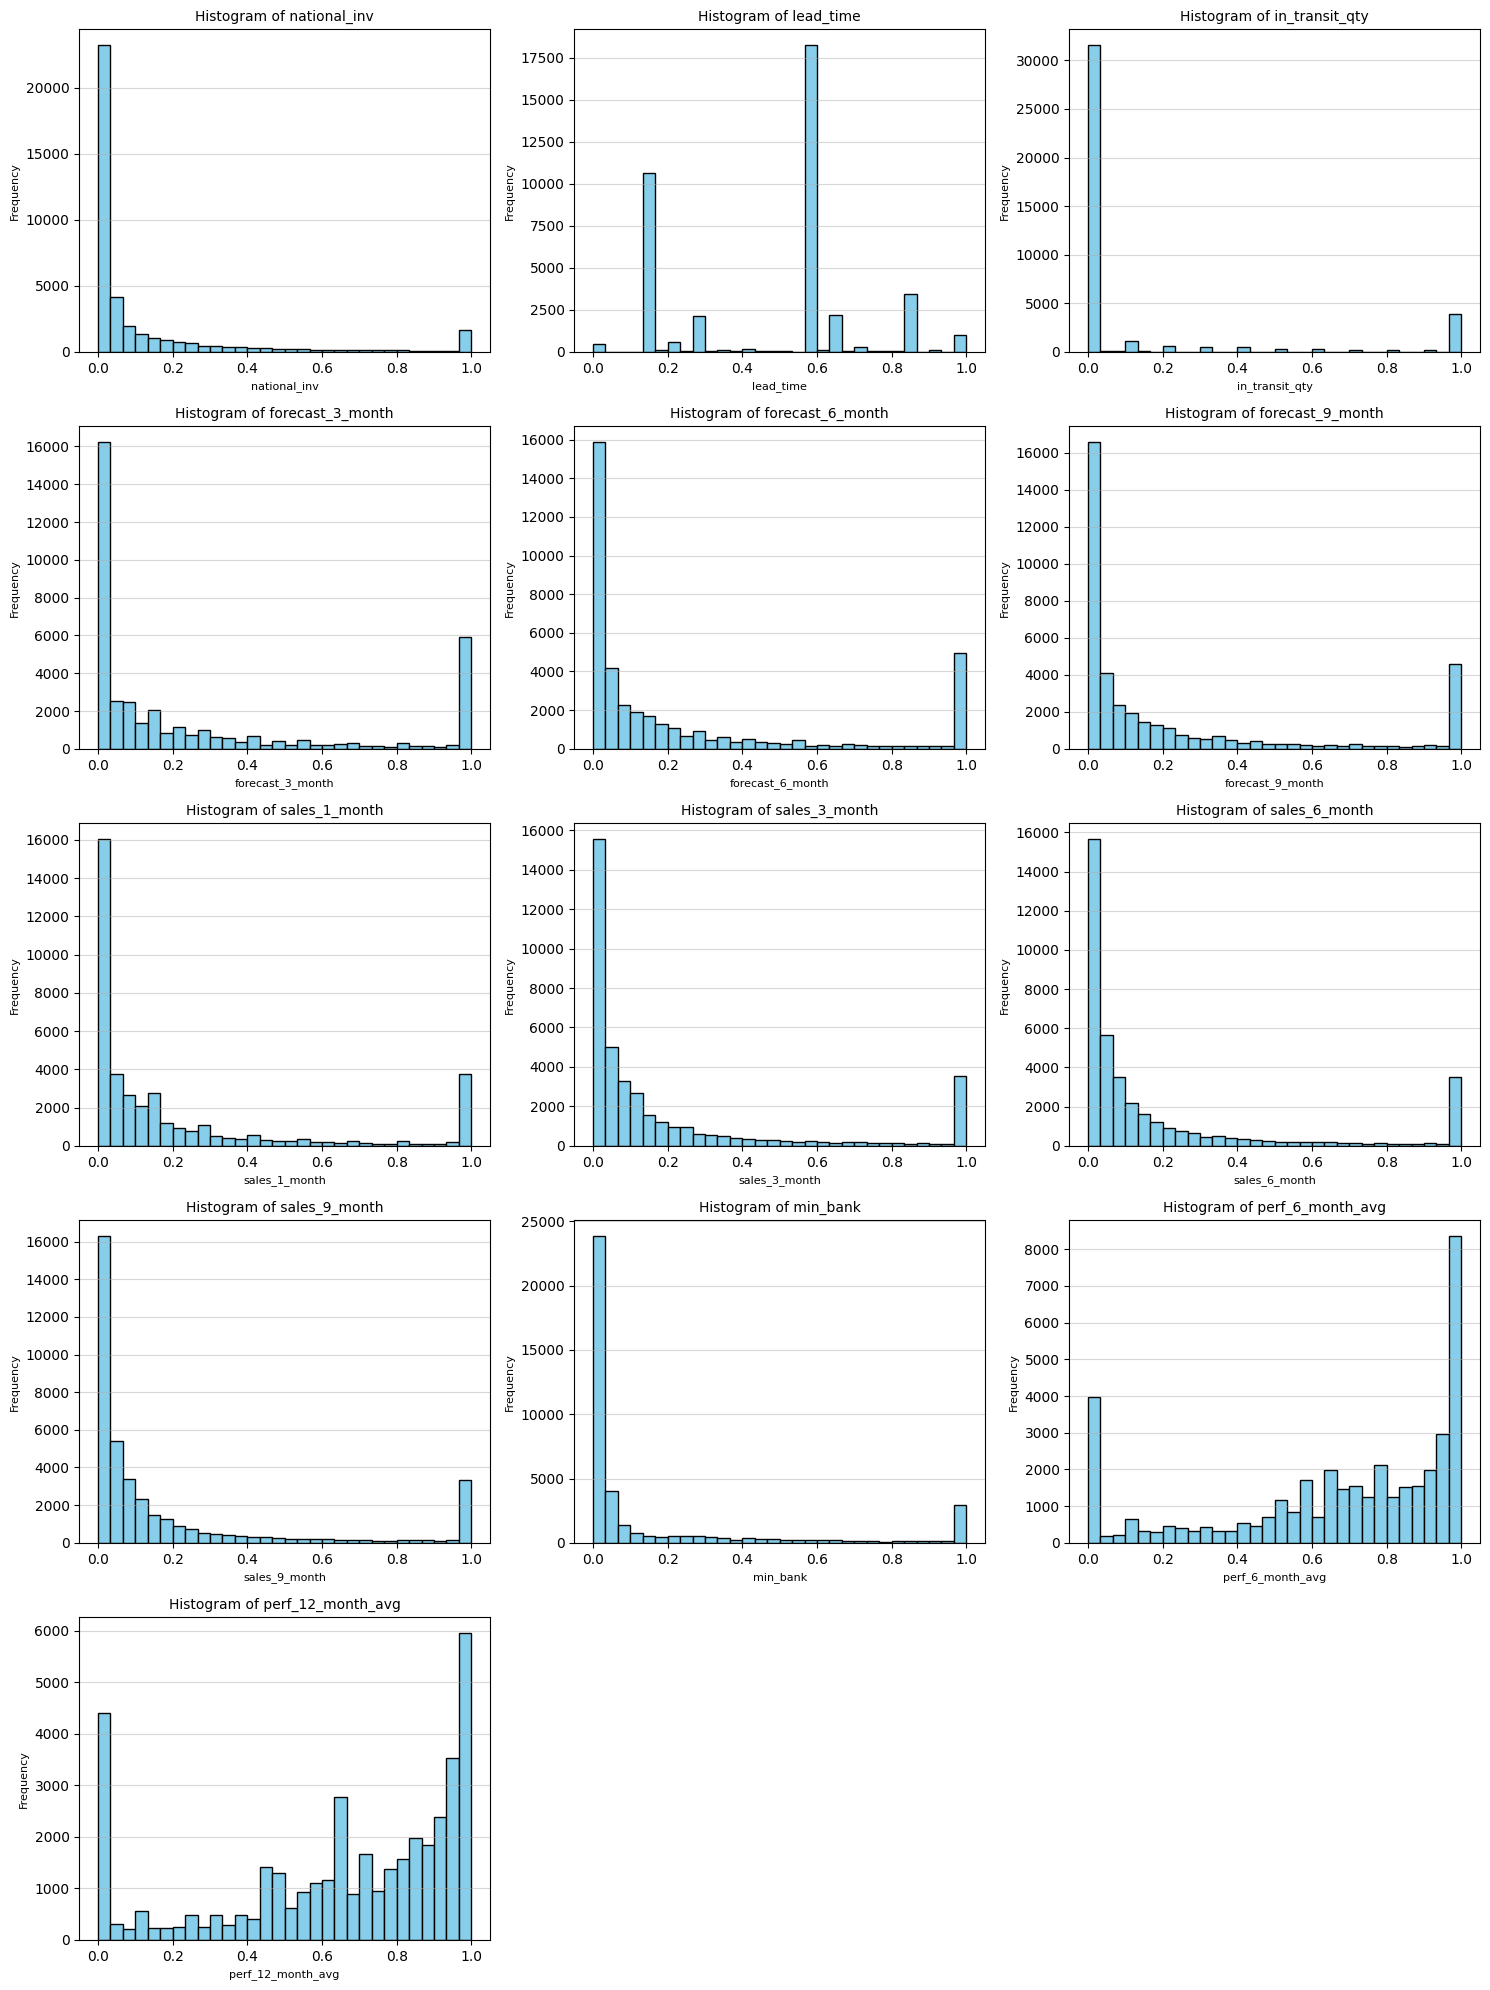

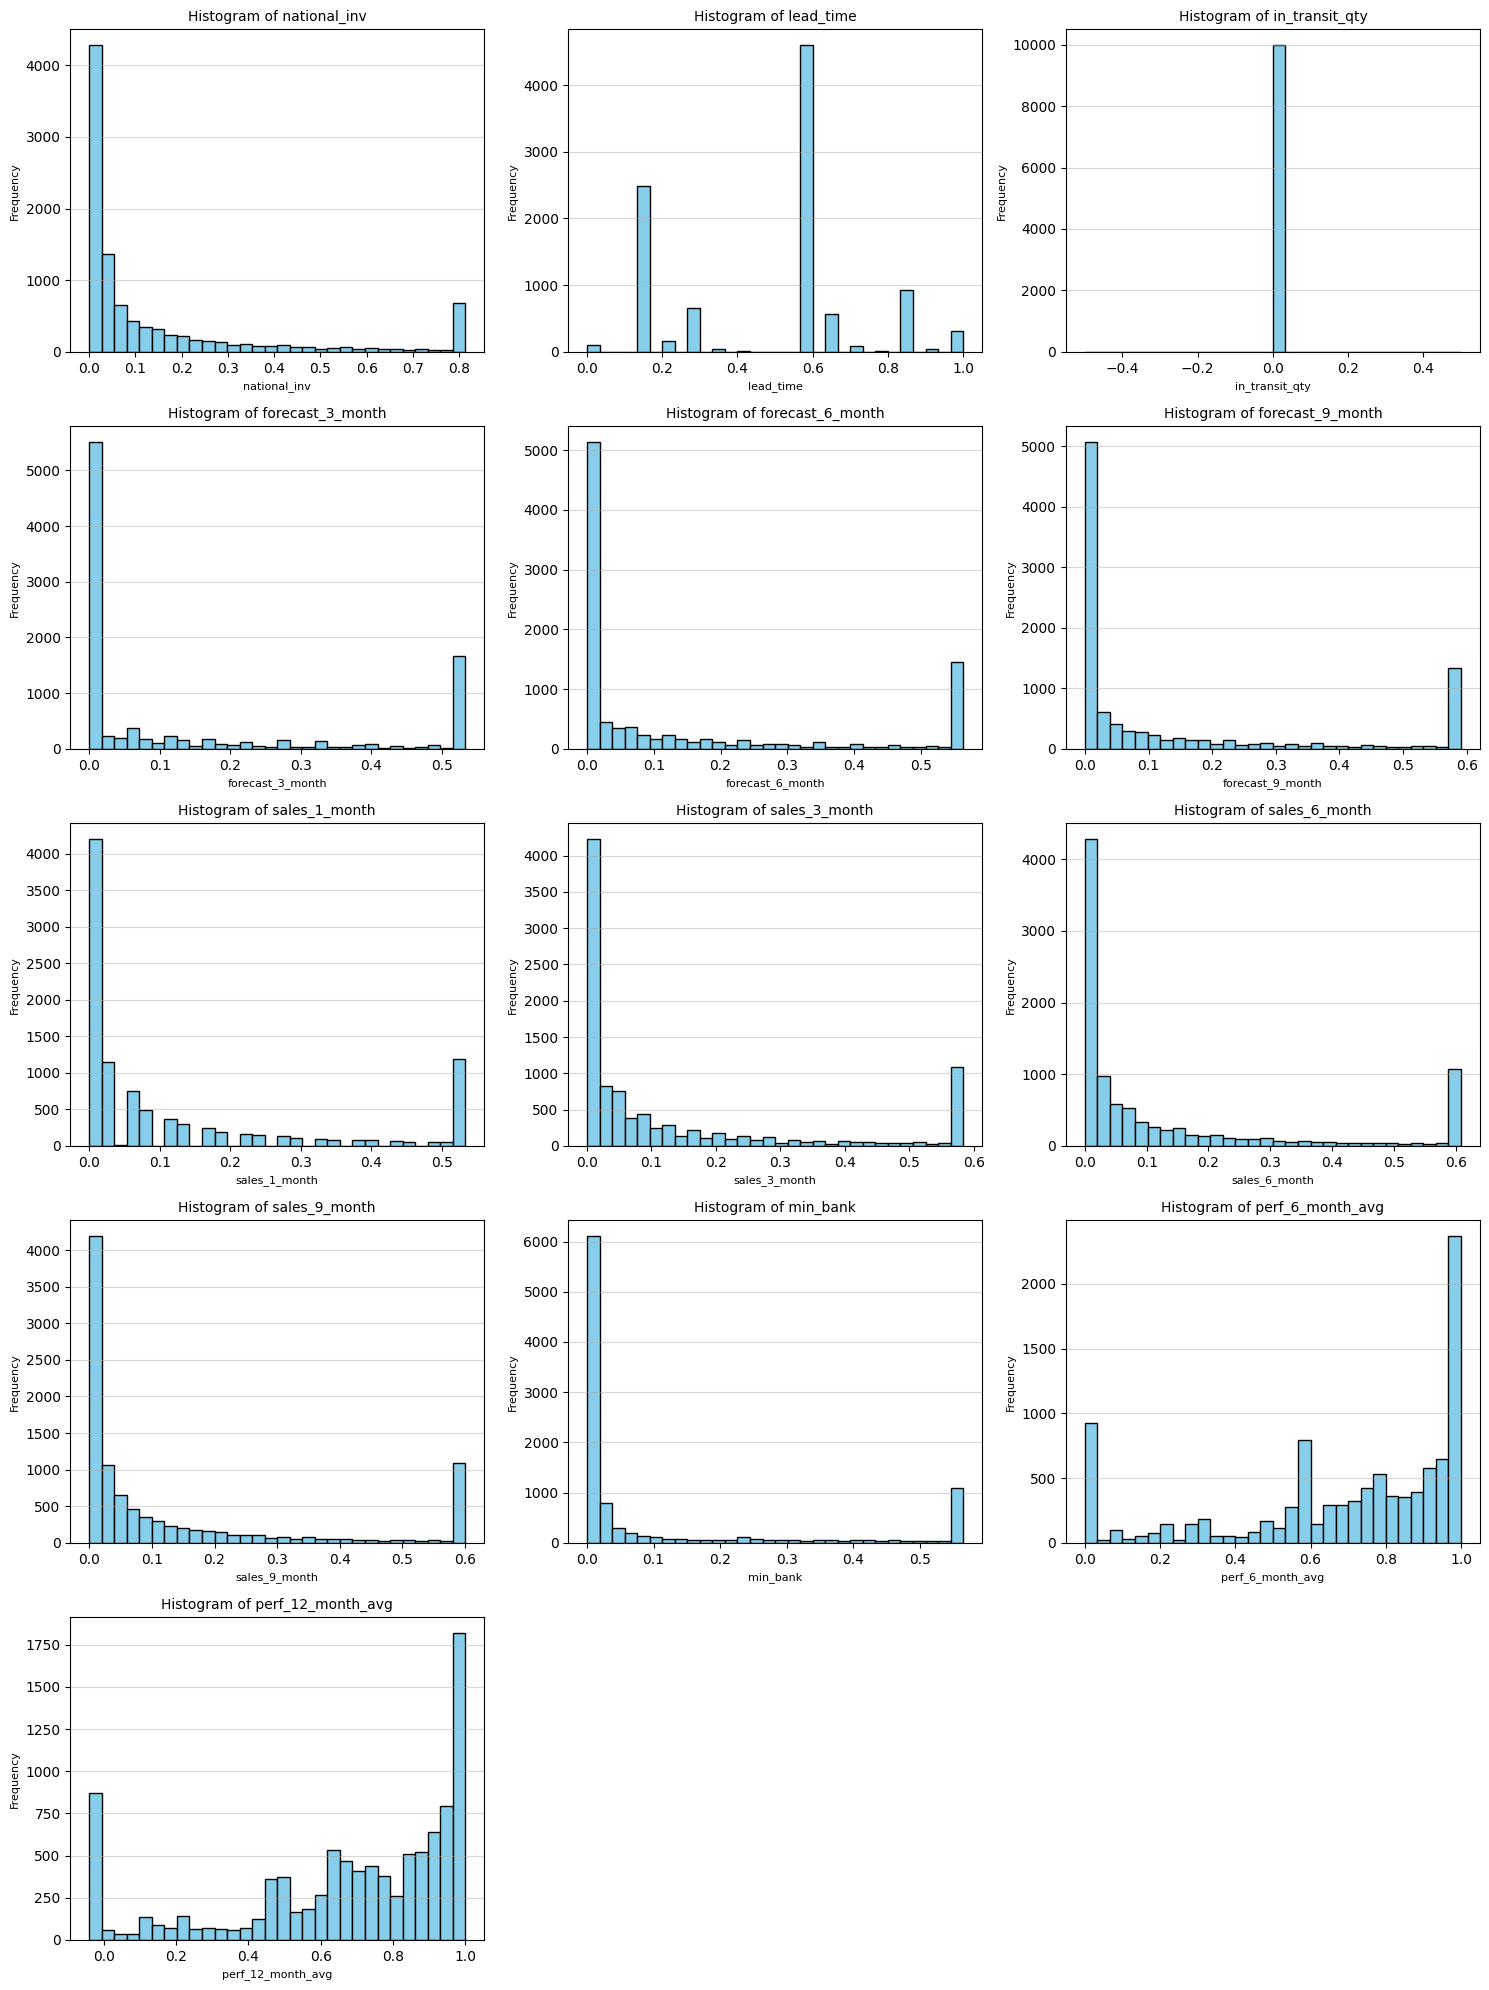

In [ ]:
histogram(train)
histogram(test)

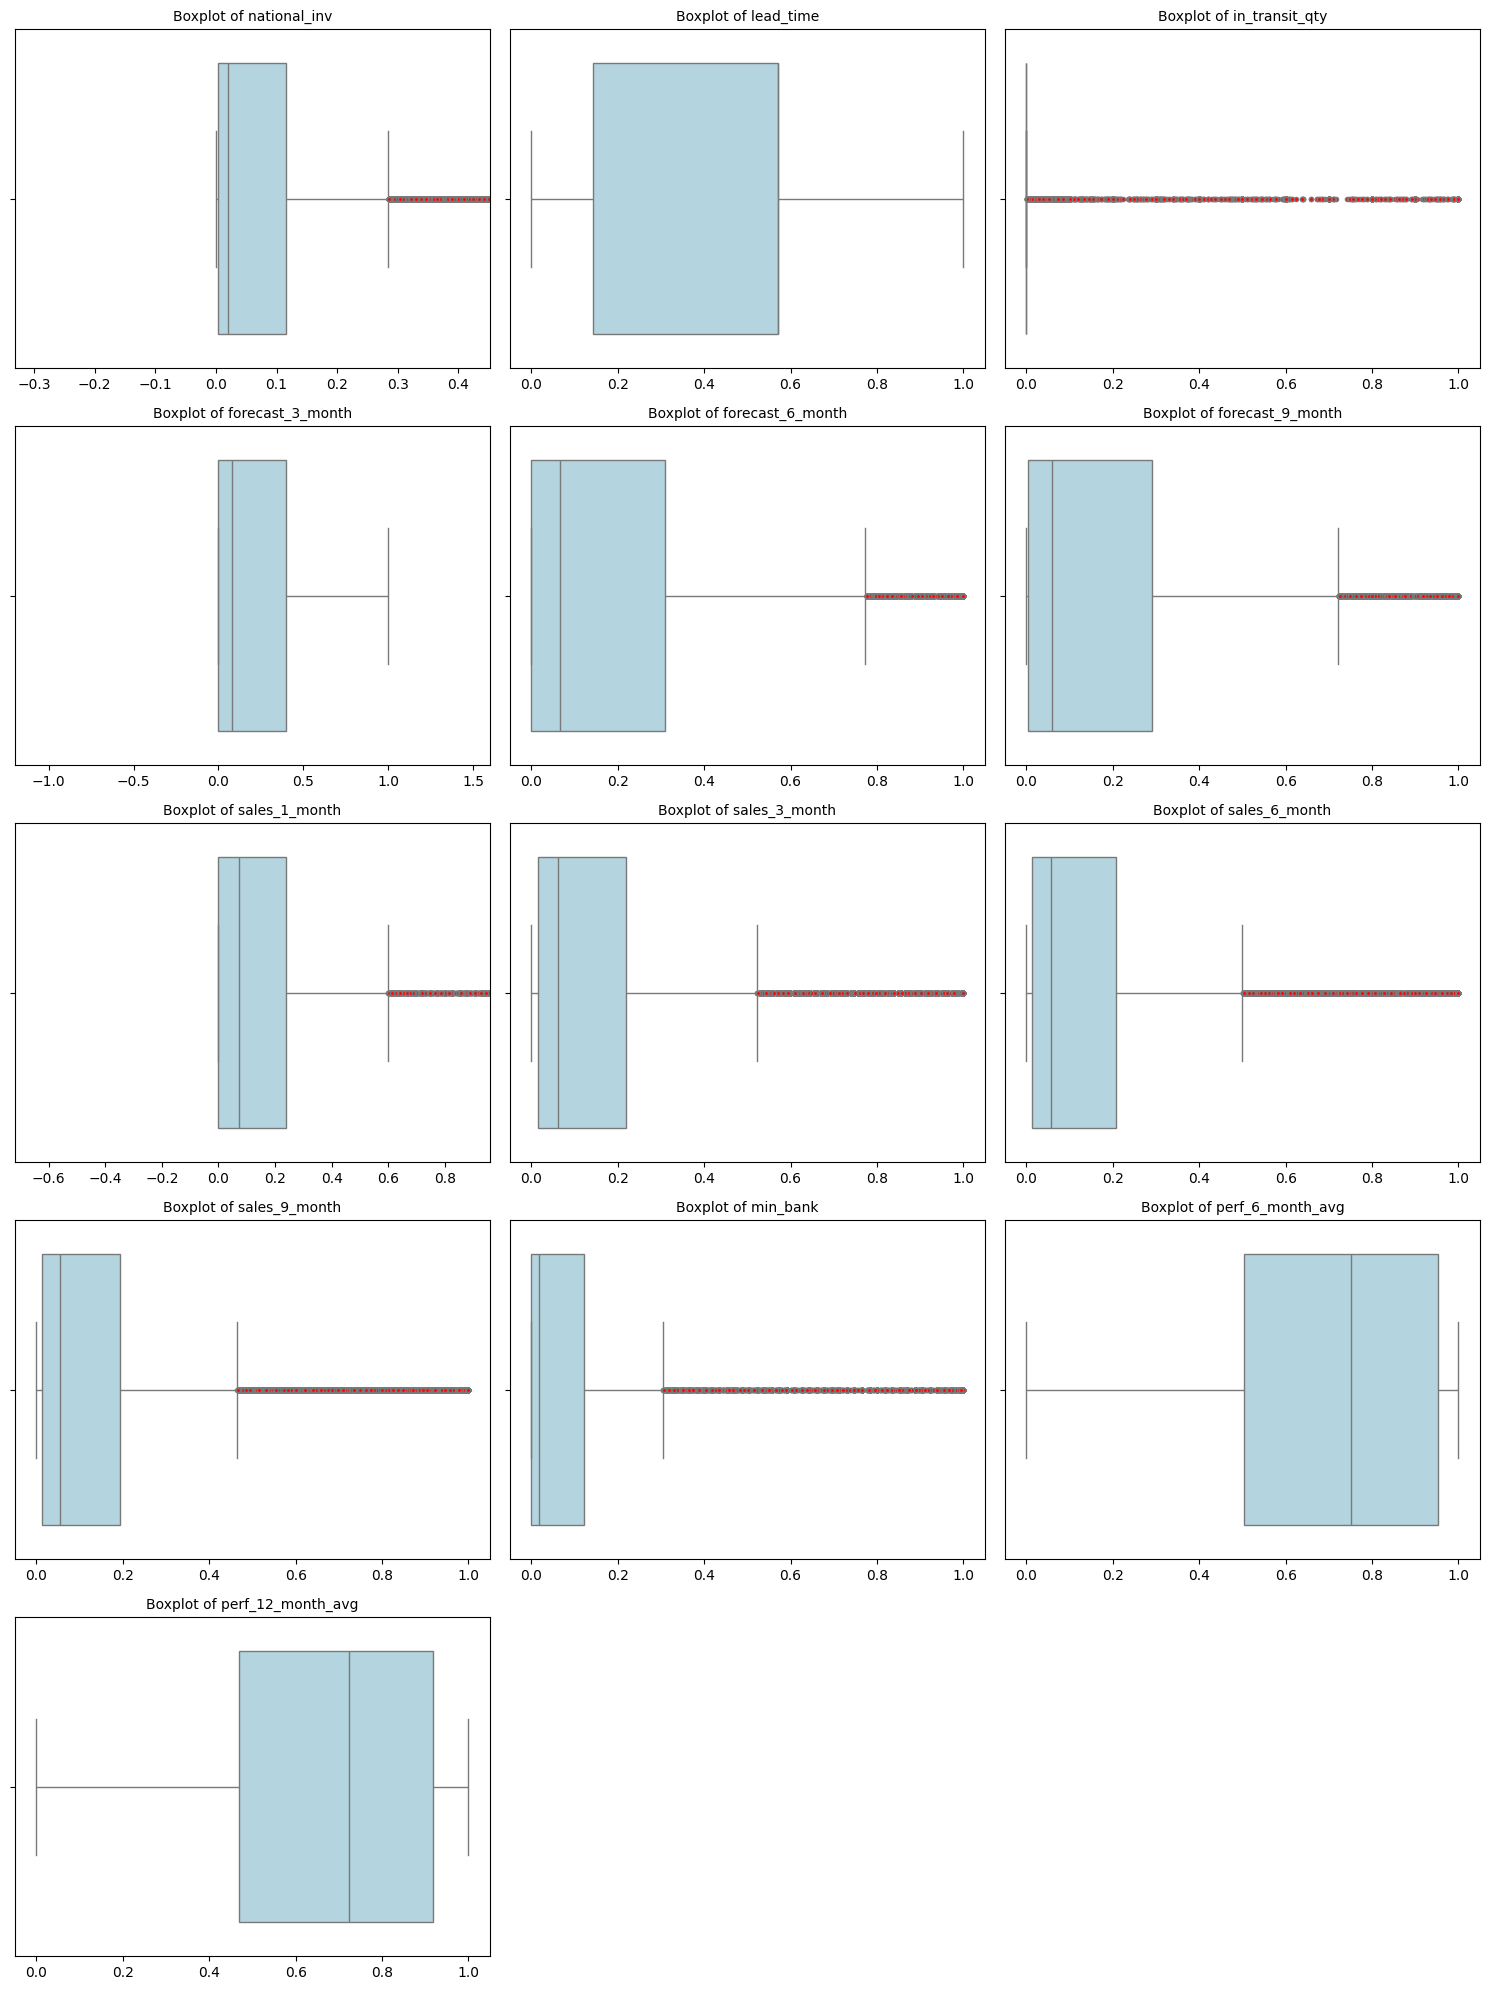

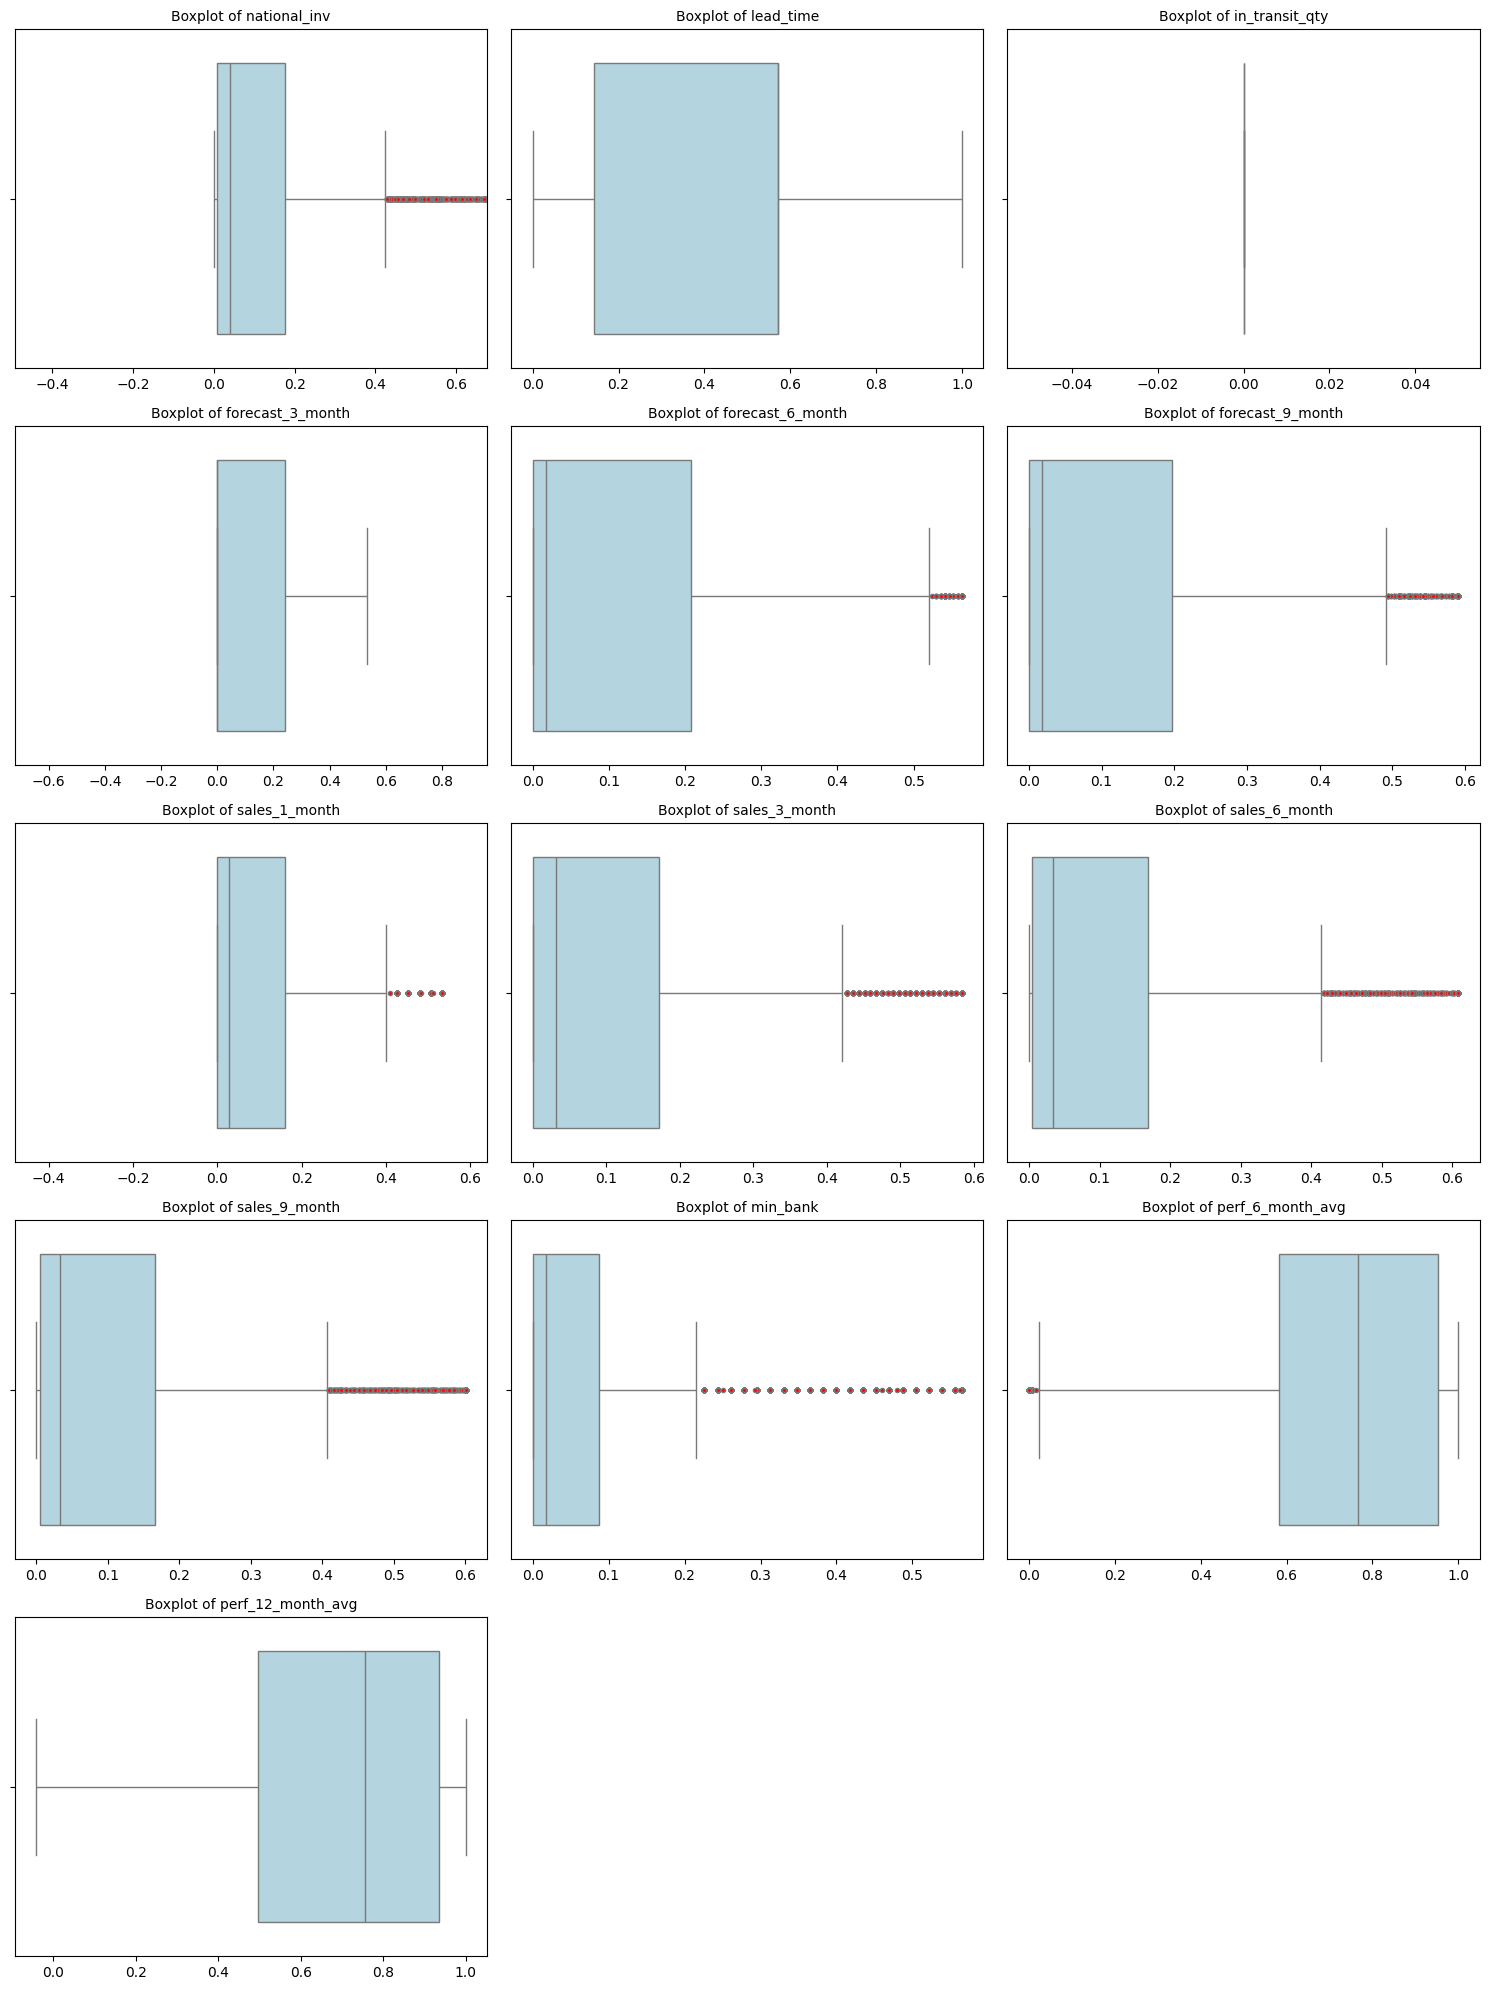

In [ ]:
boxplot(train)
boxplot(test)

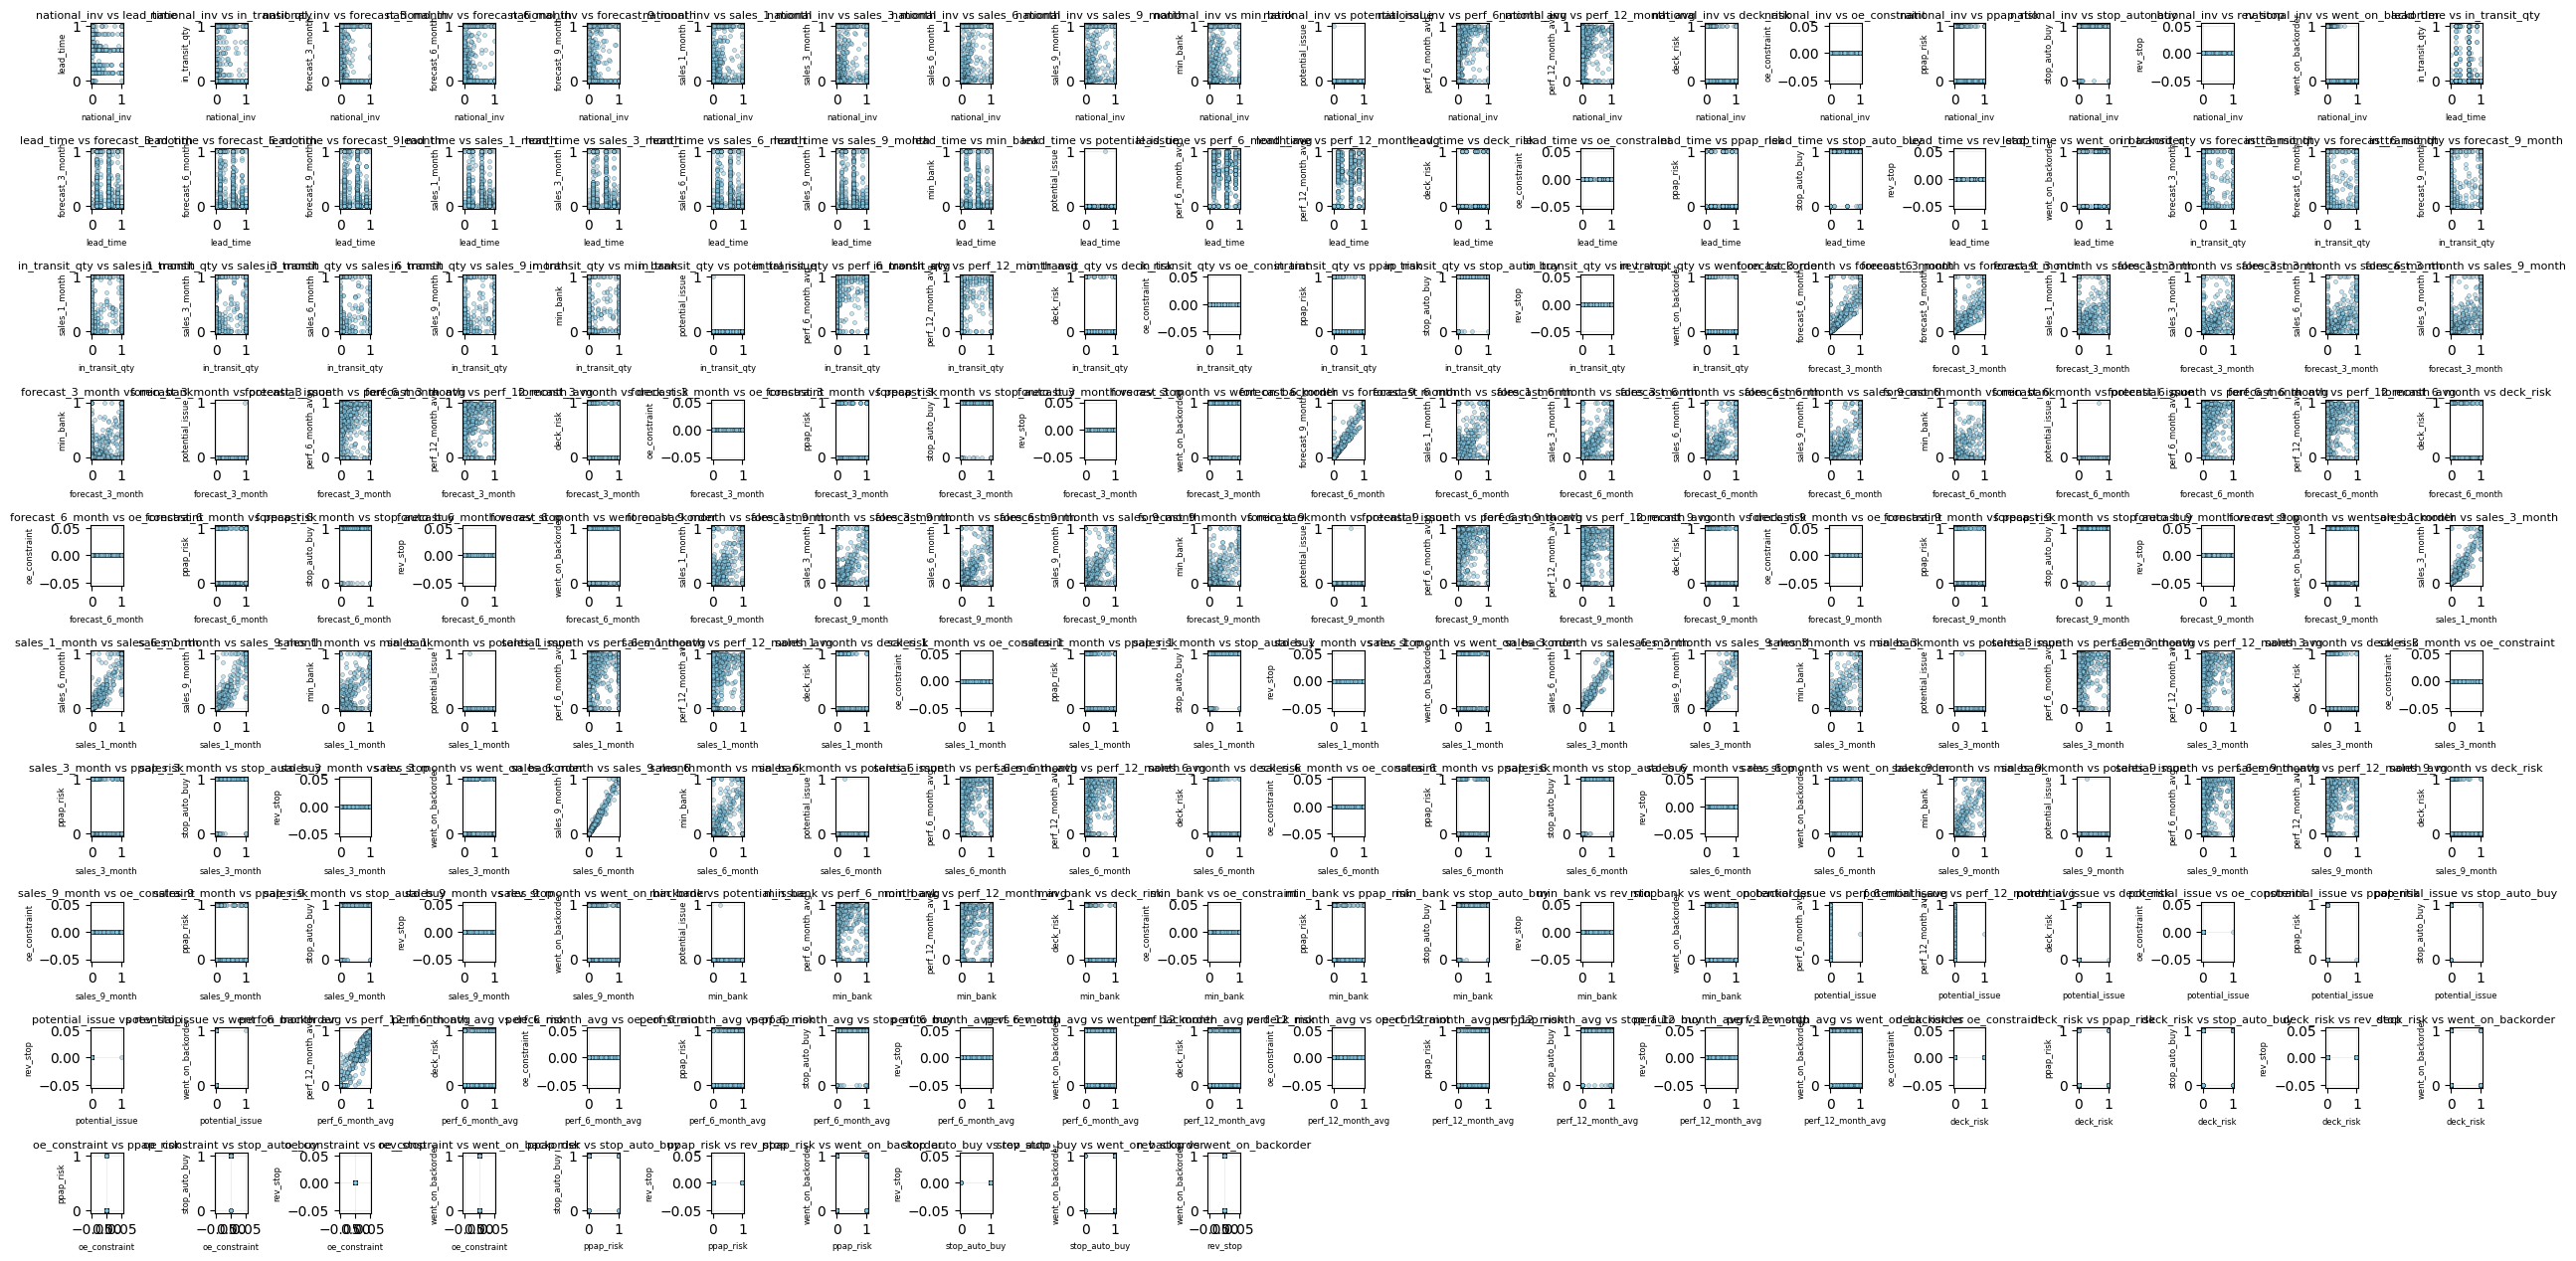

In [ ]:
pairwise_scatter(train, sample_size=1000)

In [ ]:
# Correlation
train.select_dtypes(include="number").corr()

national_inv  lead_time  in_transit_qty  forecast_3_month  \
national_inv           1.000000   0.085779        0.337267          0.132174   
lead_time              0.085779   1.000000        0.014084         -0.016319   
in_transit_qty         0.337267   0.014084        1.000000          0.412943   
forecast_3_month       0.132174  -0.016319        0.412943          1.000000   
forecast_6_month       0.233852  -0.015989        0.484337          0.932776   
forecast_9_month       0.274543  -0.011890        0.507472          0.899939   
sales_1_month          0.439425   0.005077        0.558478          0.676928   
sales_3_month          0.474800   0.023465        0.580454          0.686103   
sales_6_month          0.497556   0.038131        0.583228          0.671682   
sales_9_month          0.511826   0.051217        0.581345          0.661989   
min_bank               0.493526   0.055751        0.569796          0.631029   
potential_issue       -0.005622   0.002925       -0.005421          0.061193   
perf_6_month_avg       0.068462   0.032303        0.049201         -0.106407   
perf_12_month_avg      0.066871   0.026443        0.051590         -0.098562   
deck_risk             -0.055356  -0.190625       -0.094915         -0.074531   
oe_constraint         -0.002081  -0.013981        0.001441          0.008611   
ppap_risk              0.000269  -0.015907       -0.015188          0.030047   
stop_auto_buy         -0.040554   0.045084        0.014409         -0.036844   
rev_stop              -0.001368   0.002054        0.013638         -0.003695   
went_on_backorder     -0.399616  -0.105268       -0.215581          0.154481   

                   forecast_6_month  forecast_9_month  sales_1_month  \
national_inv               0.233852          0.274543       0.439425   
lead_time                 -0.015989         -0.011890       0.005077   
in_transit_qty             0.484337          0.507472       0.558478   
forecast_3_month           0.932776          0.899939       0.676928   
forecast_6_month           1.000000          0.979719       0.753851   
forecast_9_month           0.979719          1.000000       0.779547   
sales_1_month              0.753851          0.779547       1.000000   
sales_3_month              0.773951          0.805373       0.959248   
sales_6_month              0.767208          0.801060       0.934592   
sales_9_month              0.758852          0.793385       0.922406   
min_bank                   0.721665          0.750220       0.788344   
potential_issue            0.055791          0.052556       0.030443   
perf_6_month_avg          -0.072215         -0.060531      -0.012875   
perf_12_month_avg         -0.065784         -0.053603      -0.005718   
deck_risk                 -0.098408         -0.115251      -0.153613   
oe_constraint              0.004910          0.004562       0.012411   
ppap_risk                  0.031167          0.027195      -0.002560   
stop_auto_buy             -0.034543         -0.028191       0.002181   
rev_stop                  -0.003505         -0.003440      -0.003413   
went_on_backorder          0.076076          0.045974      -0.032367   

                   sales_3_month  sales_6_month  sales_9_month  min_bank  \
national_inv            0.474800       0.497556       0.511826  0.493526   
lead_time               0.023465       0.038131       0.051217  0.055751   
in_transit_qty          0.580454       0.583228       0.581345  0.569796   
forecast_3_month        0.686103       0.671682       0.661989  0.631029   
forecast_6_month        0.773951       0.767208       0.758852  0.721665   
forecast_9_month        0.805373       0.801060       0.793385  0.750220   
sales_1_month           0.959248       0.934592       0.922406  0.788344   
sales_3_month           1.000000       0.983648       0.972495  0.828434   
sales_6_month           0.983648       1.000000       0.992427  0.840279   
sales_9_month           0.972495       0.992427       1.000000  0

<Axes: >

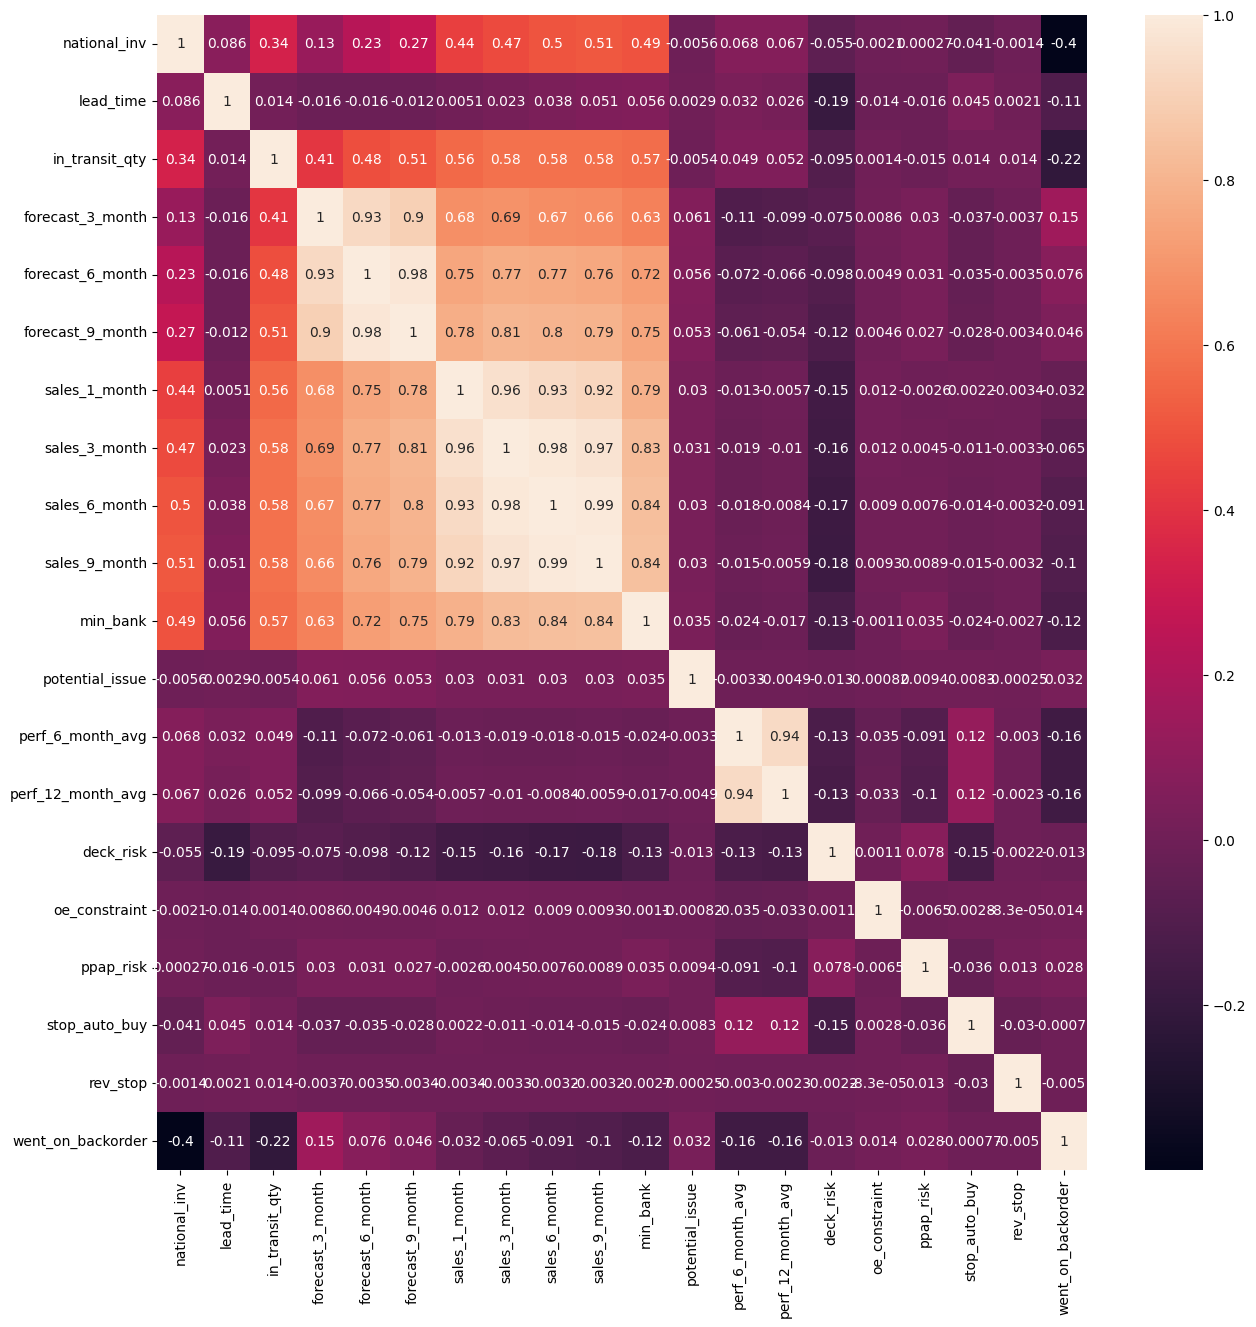

In [ ]:
# Correlation
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include="number").corr(), annot=True)

In [ ]:
# Save to new csv file
train.to_csv('/content/drive/MyDrive/Thesis/Train_dataset_3.csv', index=False)
test.to_csv('/content/drive/MyDrive/Thesis/Test_dataset_3.csv', index=False)